# Summarize recorded interactions

In [1]:
# Import some useful modules
import json
import sys
import networkx
import pandas
import numpy

import matplotlib.pyplot as plotter
from pathlib import Path
from IPython.display import display, HTML

Specify the RESULTS_DIR used for recording interactions

In [2]:
# USE ABSOLUTE PATHS HERE!!!
DATA_DIR = Path("/home/ashinde/PhD/CaffineBravery/results/results_l3_control/")
DATA_FILES = list(DATA_DIR.iterdir())

for _file in DATA_FILES:
    print(f"Using {_file}")

Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1280429864_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1914108708_attl0_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/426019904_defl1_active_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/314411620_defl1_passive_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/855700733_attl2_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/324112183_defl3_pol_graph.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.0.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.1.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.2.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.3.json
Using /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.4.json
Using 

In [3]:
# Common utility function for reading JSON from a file
def load_json(fname):

    data = None

    with open(fname) as f:
        data = json.load(f)

    return data

---
Take a look at the policy graphs of the agents

In [4]:
# Draw policy graphs
import graphviz


def get_edge_map(edges):
    start = 0
    edge_map = {}
    multi_edge_map = {}
    
    for src, children in edges.items():
        for obs, child in children.items():
            
            # index this observation if not already done
            if obs not in edge_map.keys():
                edge_map[obs] = start
                start += 1
                
            # Add obs to (src, dst) key
            if (src, child) not in multi_edge_map.keys():
                multi_edge_map[(src, child)] = [edge_map[obs]]
            
            else:
                _l = multi_edge_map[(src, child)]
                _l.append(edge_map[obs])
                multi_edge_map[(src, child)] = _l
                
    return edge_map, multi_edge_map


def get_graphviz_graph(json_data):
    
    # initialize empty graph
    G = graphviz.Digraph()
    
    nodes = json_data["nodes"]
    edges = json_data["edges"]
    
    edge_map, multi_edge_map = get_edge_map(edges)
    print(f"Edge map is:")
    for e, i in edge_map.items():
        print(f"{i}:{e}")

    for k, v in nodes.items():
        l = v["act"] + "_start" if "start" in v.keys() else v["act"]
        G.node(k, label=l, fontsize="12")
        
    for s, t in multi_edge_map.keys():
        G.edge(s, t, label=str(multi_edge_map[(s, t)]))
        
    return G

---
## Plot policy graphs

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1280429864_attl0_pol_graph.json
Edge map is:
0:[(ActionResult, failure), (ConnObs, active)]
1:[(ActionResult, success), (ConnObs, active)]
2:[(ActionResult, success), (ConnObs, inactive)]
3:[(ActionResult, failure), (ConnObs, inactive)]


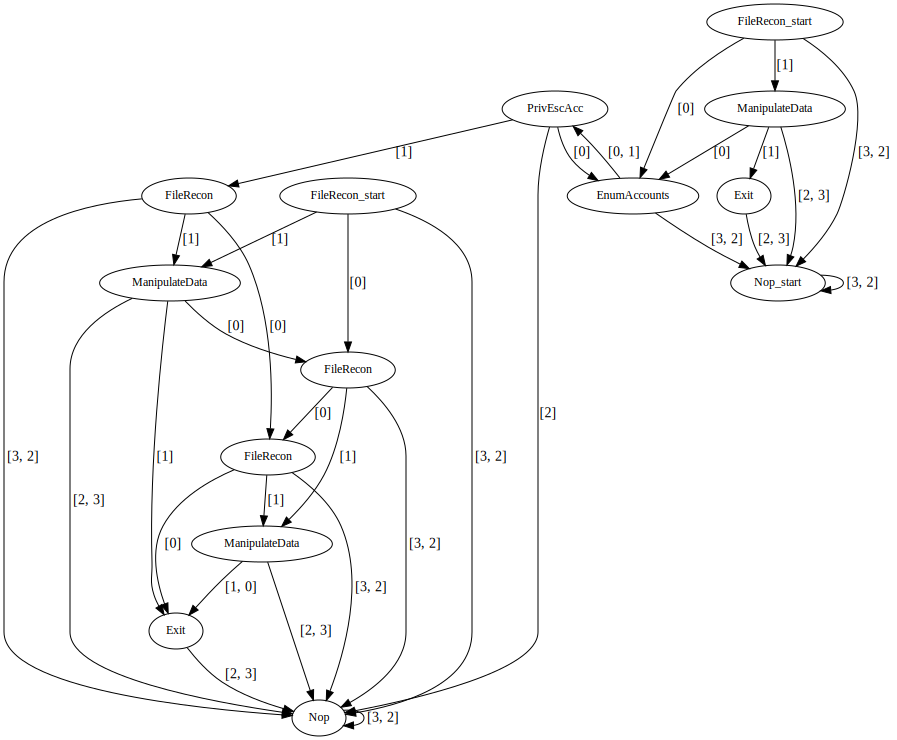

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/1914108708_attl0_pol_graph.json
Edge map is:
0:[(ActionResult, success), (ConnObs, inactive)]
1:[(ActionResult, failure), (ConnObs, inactive)]
2:[(ActionResult, failure), (ConnObs, active)]
3:[(ActionResult, success), (ConnObs, active)]


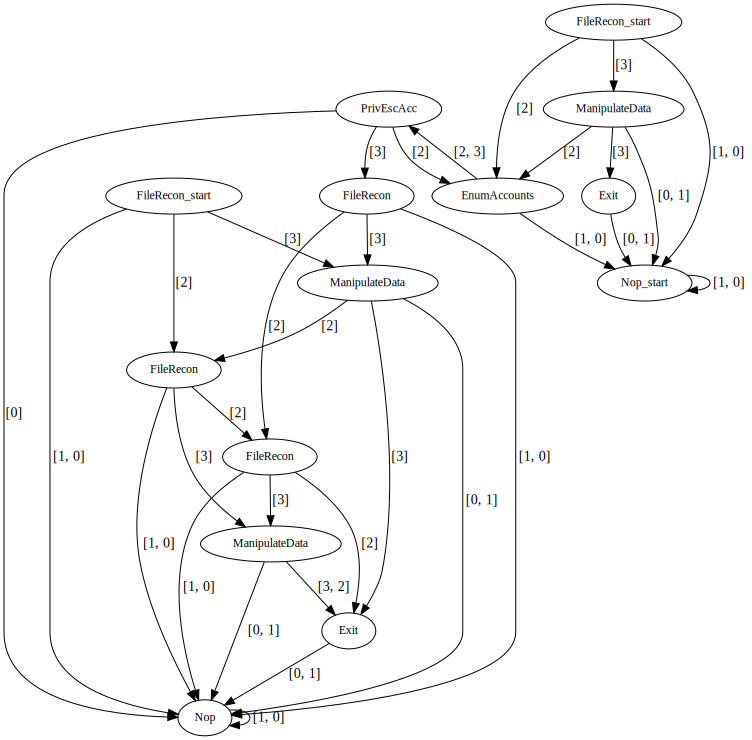

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/426019904_defl1_active_pol_graph.json
Edge map is:
0:[(EndPtAlerts, file_enum)]
1:[(EndPtAlerts, file_write)]
2:[(EndPtAlerts, none)]
3:[(EndPtAlerts, su_login)]


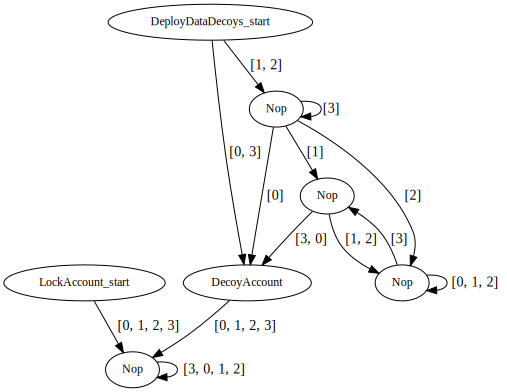

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/314411620_defl1_passive_pol_graph.json
Edge map is:
0:[(EndPtAlerts, su_login)]
1:[(EndPtAlerts, file_enum)]
2:[(EndPtAlerts, file_write)]
3:[(EndPtAlerts, none)]


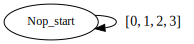

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/855700733_attl2_pol_graph.json
Edge map is:
0:[(ActionResult, failure), (ConnObs, active)]
1:[(ActionResult, success), (ConnObs, active)]
2:[(ActionResult, success), (ConnObs, inactive)]
3:[(ActionResult, failure), (ConnObs, inactive)]


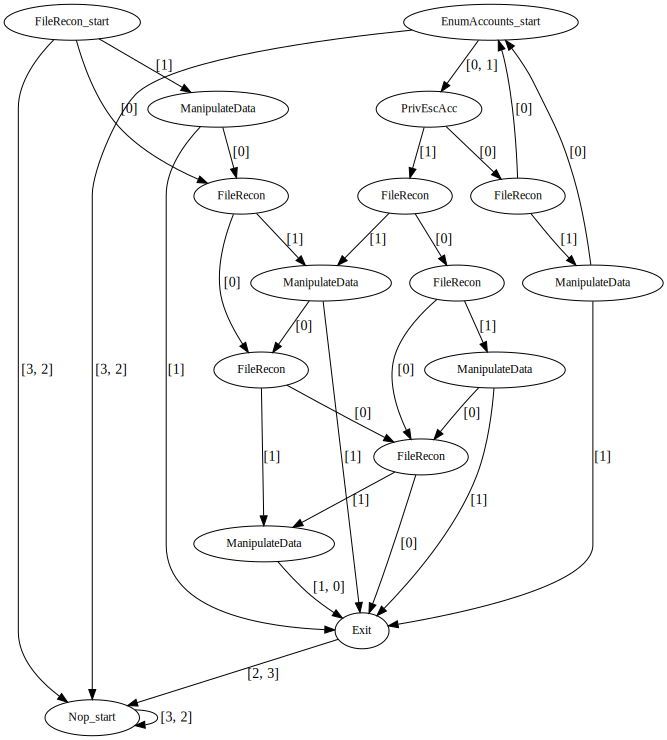

Displaying /home/ashinde/PhD/CaffineBravery/results/results_l3_control/324112183_defl3_pol_graph.json
Edge map is:
0:[(EndPtAlerts, su_login)]
1:[(EndPtAlerts, file_enum)]
2:[(EndPtAlerts, file_write)]
3:[(EndPtAlerts, none)]


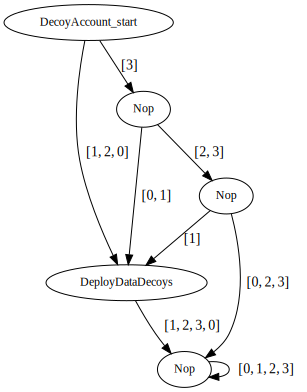

In [5]:
GRAPH_FILES = list(filter(lambda x: "pol_graph" in x.parts[-1], DATA_FILES))

for g in GRAPH_FILES:
    print(f"Displaying {g}")
    data = load_json(g)
    G = get_graphviz_graph(data)
    display(G)

---
Summarize the actual interactions

In [6]:
# Get the trace files
TRACE_FILES = list(filter(lambda x: "trace" in x.parts[-1], DATA_FILES))

for _file in TRACE_FILES:
    print(f"Using trace from {_file}")


Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.0.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.1.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.2.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.3.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.4.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.5.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.6.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.7.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.8.json
Using trace from /home/ashinde/PhD/CaffineBravery/results/results_l3_control/trace.9.json


+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                         su_login
2                               1.0                        file_enum
3                               1.0                       file_write
4                               1.0                         su_login
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                       file_write
9                               1.0                             none

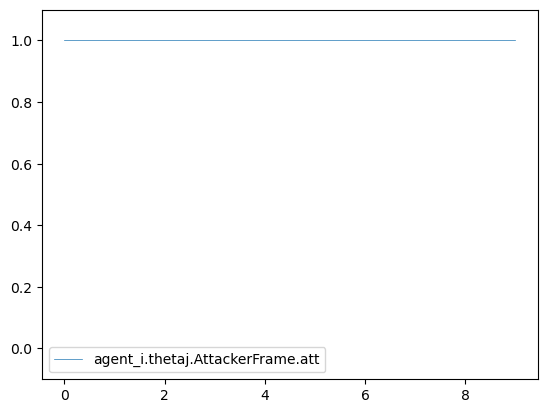

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.333333                        0.666667   
2                         0.333333                        0.666667   
3                         0.468354                        0.531646   
4                         0.499965                        0.500035   
5                         0.499965                        0.500035   
6                         0.499965                        0.500035   
7                         0.499965                        0.500035   
8                         0.499965                        0.500035   
9                         0.499965                        0.500035   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           failure                     inactive  
5                           success                     inactive  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

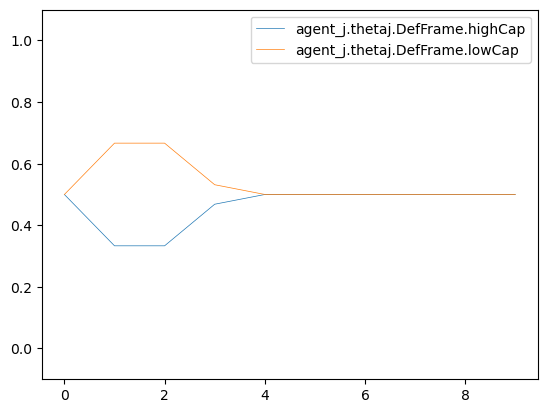

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0      DecoyAccount   
1                   0.0                    1.0  DeployDataDecoys   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

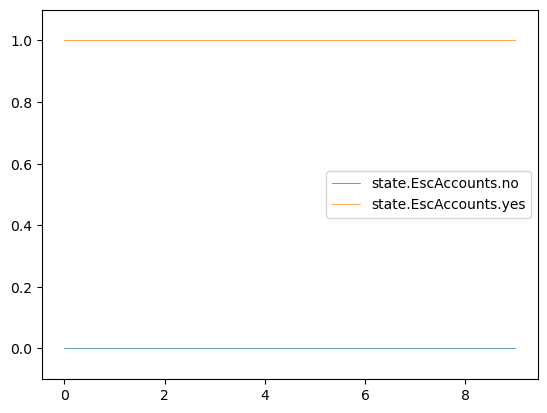

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0  DeployDataDecoys   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                         su_login  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

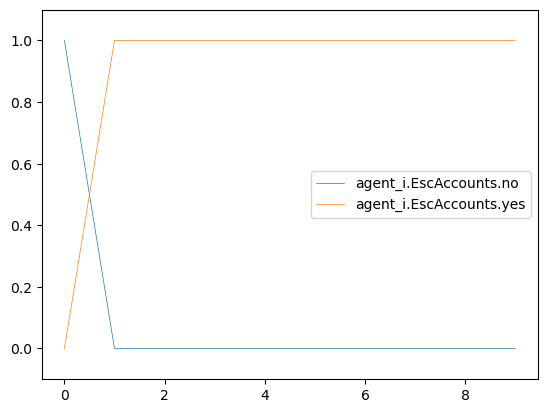

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                     0.0                      1.0    EnumAccounts   
1                     0.0                      1.0      PrivEscAcc   
2                     0.0                      1.0       FileRecon   
3                     0.0                      1.0  ManipulateData   
4                     0.0                      1.0            Exit   
5                     0.0                      1.0             Nop   
6                     0.0                      1.0             Nop   
7                     0.0                      1.0             Nop   
8                     0.0                      1.0             Nop   
9                     0.0                      1.0             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           success   
3               Nop                           success   
4               Nop                           failure   
5               Nop                           success   
6               Nop                           failure   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

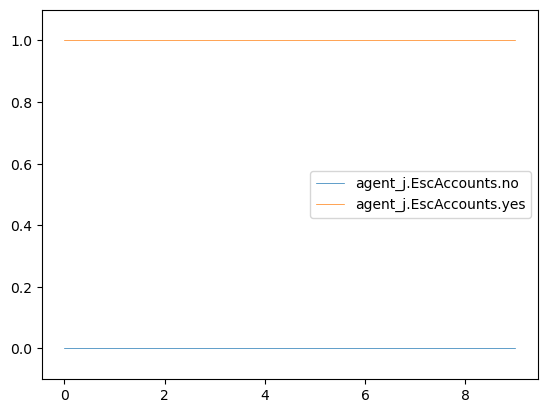

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0      DecoyAccount   
1                    1.0                     0.0  DeployDataDecoys   
2                    1.0                     0.0               Nop   
3                    1.0                     0.0               Nop   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

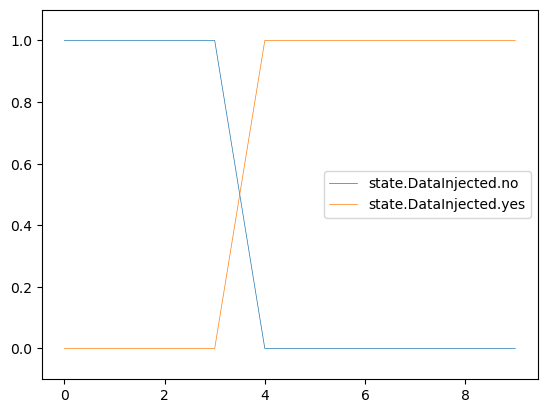

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000  DeployDataDecoys   
2                 1.000000                  0.000000               Nop   
3                 1.000000                  0.000000               Nop   
4                 0.031965                  0.968035               Nop   
5                 0.040982                  0.959018               Nop   
6                 0.000701                  0.999299               Nop   
7                 0.000446                  0.999554               Nop   
8                 0.000446                  0.999554               Nop   
9                 0.000446                  0.999554               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                         su_login  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

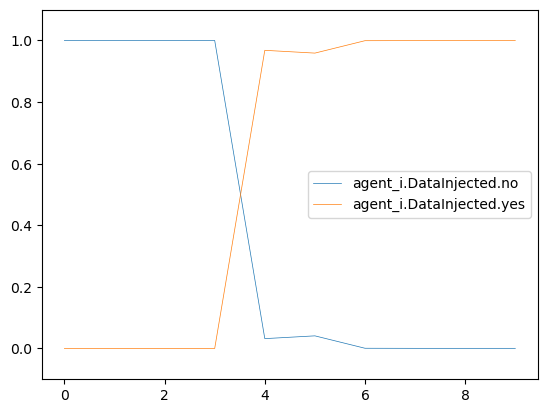

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000    EnumAccounts   
1                 1.000000                  0.000000      PrivEscAcc   
2                 1.000000                  0.000000       FileRecon   
3                 1.000000                  0.000000  ManipulateData   
4                 0.000097                  0.999903            Exit   
5                 0.000097                  0.999903             Nop   
6                 0.000097                  0.999903             Nop   
7                 0.000097                  0.999903             Nop   
8                 0.000097                  0.999903             Nop   
9                 0.000097                  0.999903             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           success   
3               Nop                           success   
4               Nop                           failure   
5               Nop                           success   
6               Nop                           failure   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

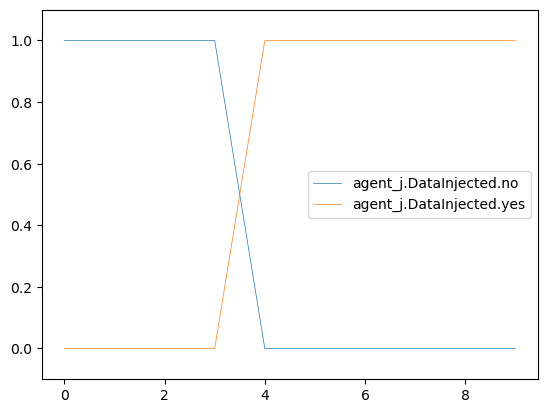

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  DeployDataDecoys   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

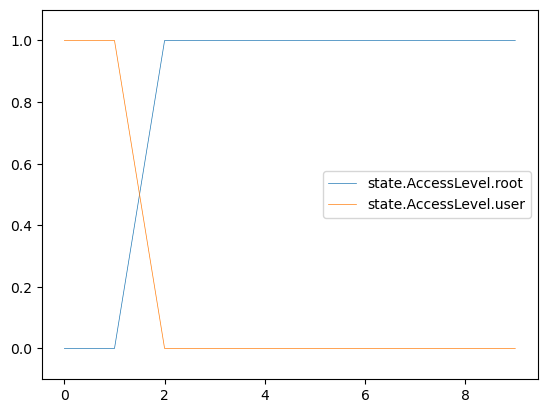

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.500000                  0.500000      DecoyAccount   
1                  0.500000                  0.500000  DeployDataDecoys   
2                  0.989999                  0.010001               Nop   
3                  0.990092                  0.009908               Nop   
4                  0.998529                  0.001470               Nop   
5                  0.998551                  0.001449               Nop   
6                  0.999996                  0.000004               Nop   
7                  0.999998                  0.000002               Nop   
8                  0.999998                  0.000002               Nop   
9                  0.999998                  0.000002               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                         su_login  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

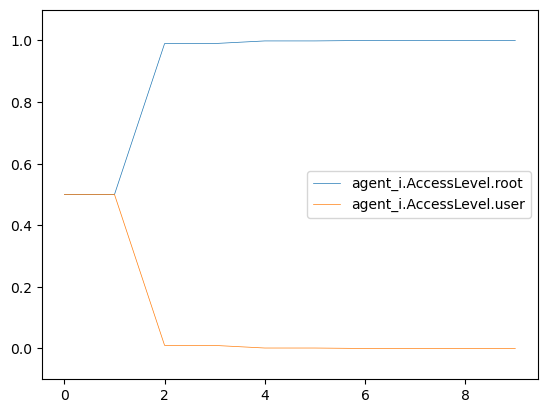

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000              1.000000e+00    EnumAccounts   
1                  0.000000              1.000000e+00      PrivEscAcc   
2                  0.999999              1.123457e-06       FileRecon   
3                  0.999999              6.683859e-07  ManipulateData   
4                  0.999999              5.618458e-07            Exit   
5                  1.000000              5.618458e-07             Nop   
6                  1.000000              5.618458e-07             Nop   
7                  1.000000              5.618458e-07             Nop   
8                  1.000000              5.618459e-07             Nop   
9                  1.000000              5.618459e-07             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           success   
3               Nop                           success   
4               Nop                           failure   
5               Nop                           success   
6               Nop                           failure   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

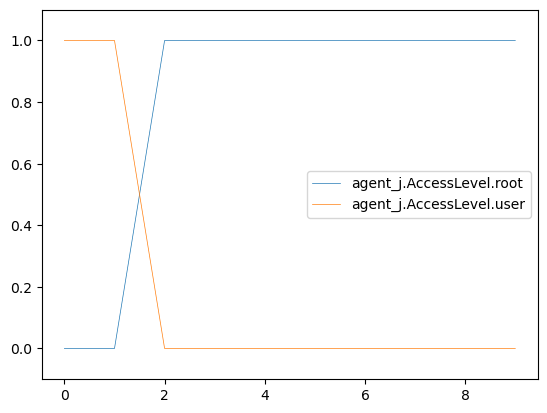

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0      DecoyAccount    EnumAccounts  
1                      1.0  DeployDataDecoys      PrivEscAcc  
2                      1.0               Nop       FileRecon  
3                      1.0               Nop  ManipulateData  
4                      1.0               Nop            Exit  
5                      1.0               Nop             Nop  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

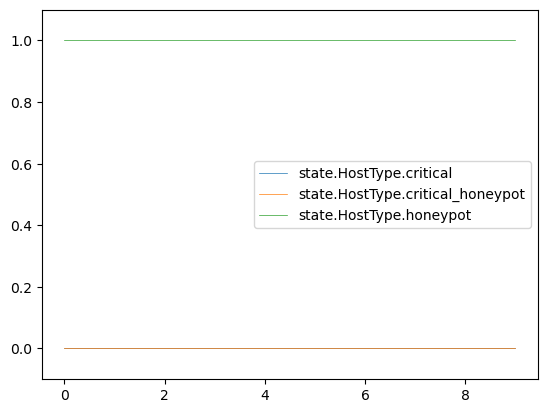

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0      DecoyAccount    EnumAccounts   
1                        1.0  DeployDataDecoys      PrivEscAcc   
2                        1.0               Nop       FileRecon   
3                        1.0               Nop  ManipulateData   
4                        1.0               Nop            Exit   
5                        1.0               Nop             Nop   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                         su_login  
2                        file_enum  
3                       file_write  
4                         su_login  
5                             none  
6                             none  
7                             none  
8                       file_write  
9                             none

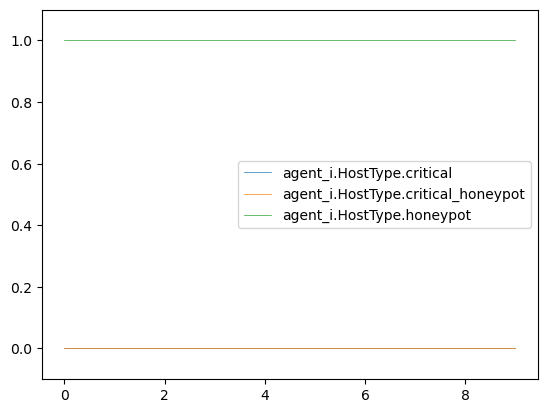

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.333333                                 0.0   
2                   0.333333                                 0.0   
3                   0.468354                                 0.0   
4                   0.499965                                 0.0   
5                   0.499965                                 0.0   
6                   0.499965                                 0.0   
7                   0.499965                                 0.0   
8                   0.499965                                 0.0   
9                   0.499965                                 0.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                   0.500000    EnumAccounts      DecoyAccount   
1                   0.666667      PrivEscAcc  DeployDataDecoys   
2                   0.666667       FileRecon               Nop   
3                   0.531646  ManipulateData               Nop   
4                   0.500035            Exit               Nop   
5                   0.500035             Nop               Nop   
6                   0.500035             Nop               Nop   
7                   0.500035             Nop               Nop   
8                   0.500035             Nop               Nop   
9                   0.500035             Nop               Nop   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           failure                     inactive  
5                           success                     inactive  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

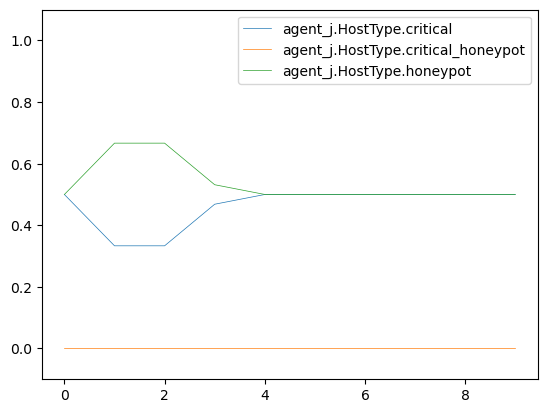

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0      DecoyAccount    EnumAccounts
1                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
2                 0.0                  1.0               Nop       FileRecon
3                 0.0                  1.0               Nop  ManipulateData
4                 0.0                  1.0               Nop            Exit
5                 1.0                  0.0               Nop             Nop
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

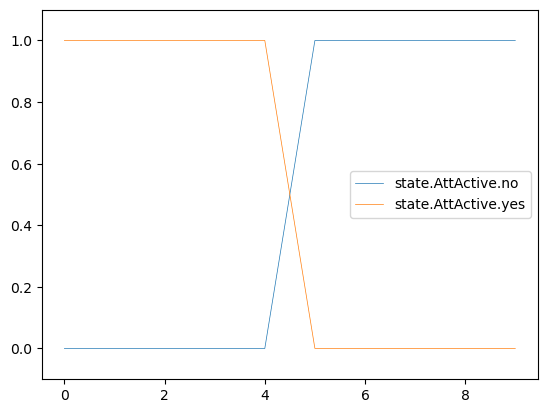

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01           5.000000e-01      DecoyAccount   
1          1.020408e-02           9.897959e-01  DeployDataDecoys   
2          2.103492e-04           9.997897e-01               Nop   
3          2.181504e-06           9.999979e-01               Nop   
4          6.134577e-07           9.999993e-01               Nop   
5          9.555683e-01           4.443159e-02               Nop   
6          9.994448e-01           5.552166e-04               Nop   
7          9.999968e-01           3.285149e-06               Nop   
8          1.000000e+00           1.070502e-08               Nop   
9          9.999999e-01           1.063107e-08               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                         su_login  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

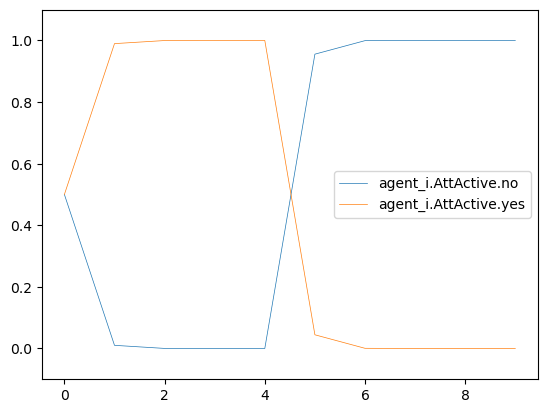

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0      PrivEscAcc   
2                   0.0                    1.0       FileRecon   
3                   0.0                    1.0  ManipulateData   
4                   0.0                    1.0            Exit   
5                   1.0                    0.0             Nop   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           success   
3               Nop                           success   
4               Nop                           failure   
5               Nop                           success   
6               Nop                           failure   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

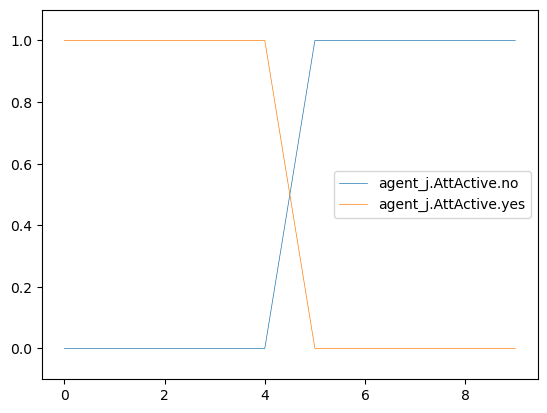

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0      DecoyAccount   
1                   1.0                   0.0  DeployDataDecoys   
2                   1.0                   0.0               Nop   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

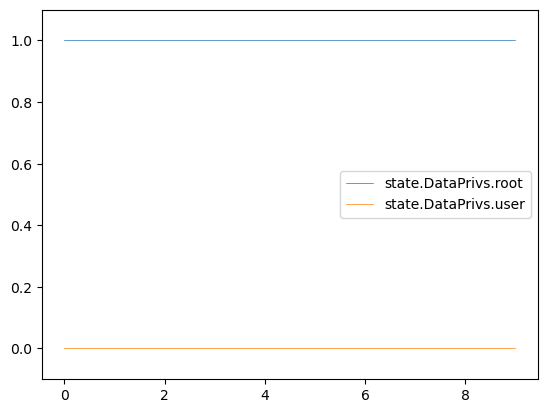

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0      DecoyAccount   
1                     1.0                     0.0  DeployDataDecoys   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                         su_login  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

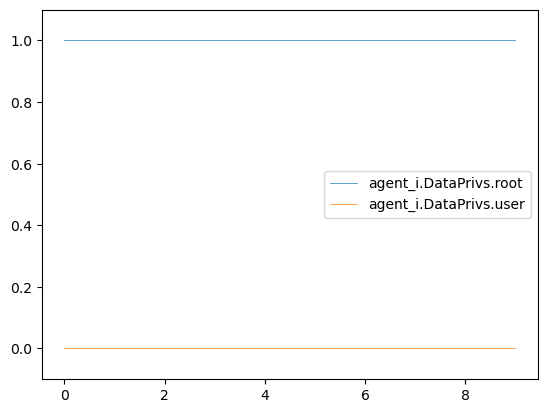

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                     0.5                     0.5    EnumAccounts   
1                     0.5                     0.5      PrivEscAcc   
2                     0.5                     0.5       FileRecon   
3                     0.5                     0.5  ManipulateData   
4                     0.5                     0.5            Exit   
5                     0.5                     0.5             Nop   
6                     0.5                     0.5             Nop   
7                     0.5                     0.5             Nop   
8                     0.5                     0.5             Nop   
9                     0.5                     0.5             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           success   
3               Nop                           success   
4               Nop                           failure   
5               Nop                           success   
6               Nop                           failure   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

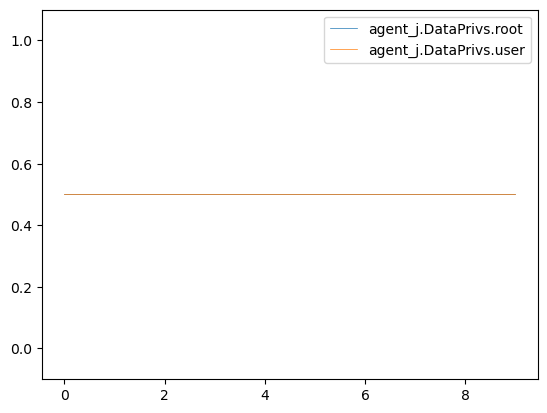

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0      DecoyAccount   
1                   1.0                    0.0  DeployDataDecoys   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

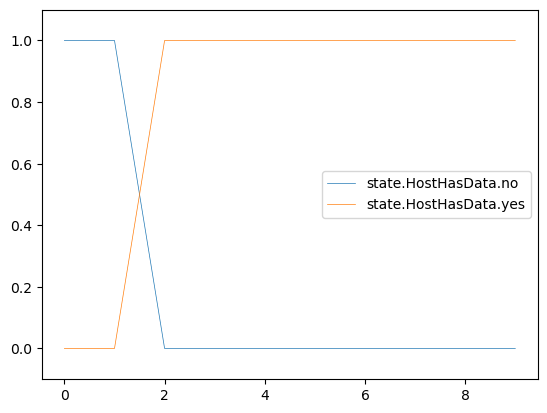

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0      DecoyAccount   
1                     1.0                      0.0  DeployDataDecoys   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                         su_login  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

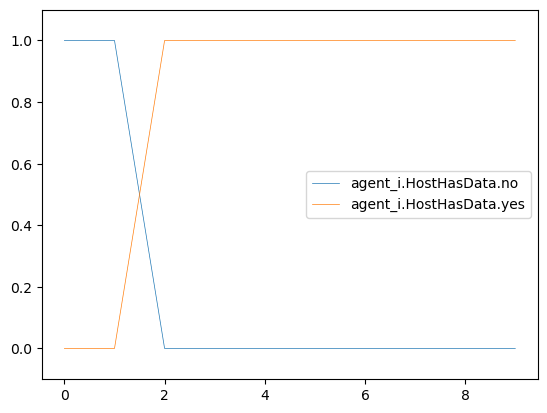

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.333333                 0.666667      PrivEscAcc   
2                0.333333                 0.666667       FileRecon   
3                0.063291                 0.936709  ManipulateData   
4                0.000070                 0.999930            Exit   
5                0.000070                 0.999931             Nop   
6                0.000070                 0.999931             Nop   
7                0.000070                 0.999931             Nop   
8                0.000070                 0.999931             Nop   
9                0.000070                 0.999931             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           success   
3               Nop                           success   
4               Nop                           failure   
5               Nop                           success   
6               Nop                           failure   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

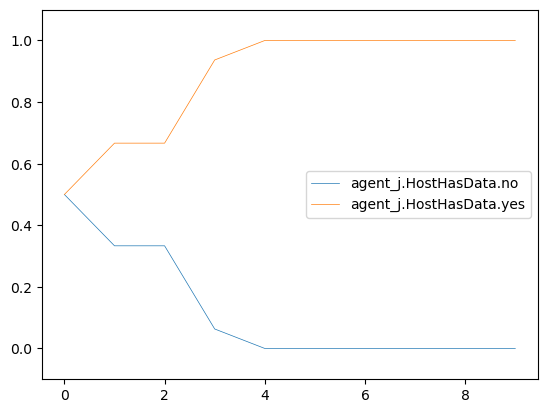

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0      DecoyAccount    EnumAccounts
1                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
2                 1.0                  0.0               Nop       FileRecon
3                 0.0                  1.0               Nop  ManipulateData
4                 0.0                  1.0               Nop            Exit
5                 0.0                  1.0               Nop             Nop
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

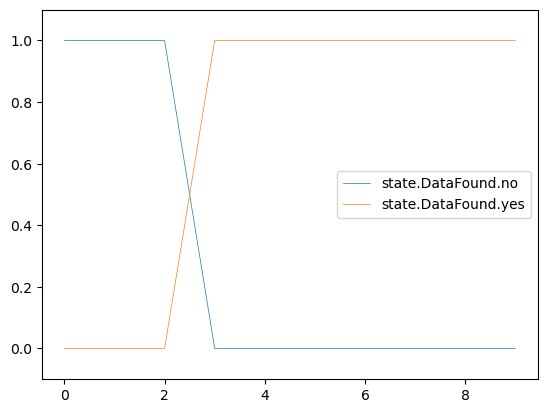

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000      DecoyAccount   
1              1.000000               0.000000  DeployDataDecoys   
2              1.000000               0.000000               Nop   
3              0.207935               0.792065               Nop   
4              0.028862               0.971138               Nop   
5              0.019188               0.980812               Nop   
6              0.000420               0.999580               Nop   
7              0.000367               0.999633               Nop   
8              0.000367               0.999633               Nop   
9              0.000367               0.999633               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                         su_login  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

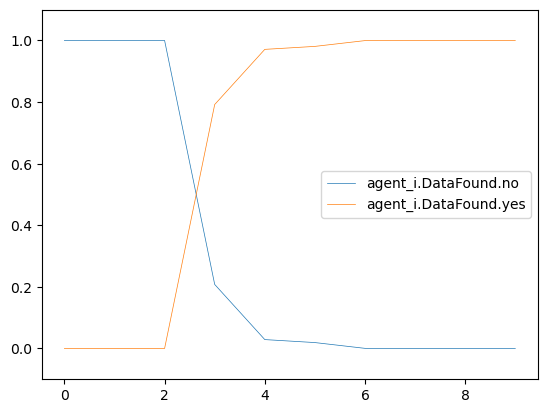

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000    EnumAccounts   
1              1.000000               0.000000      PrivEscAcc   
2              1.000000               0.000000       FileRecon   
3              0.088608               0.911392  ManipulateData   
4              0.000097               0.999903            Exit   
5              0.000097               0.999903             Nop   
6              0.000097               0.999903             Nop   
7              0.000097               0.999903             Nop   
8              0.000097               0.999903             Nop   
9              0.000097               0.999903             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           success   
3               Nop                           success   
4               Nop                           failure   
5               Nop                           success   
6               Nop                           failure   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

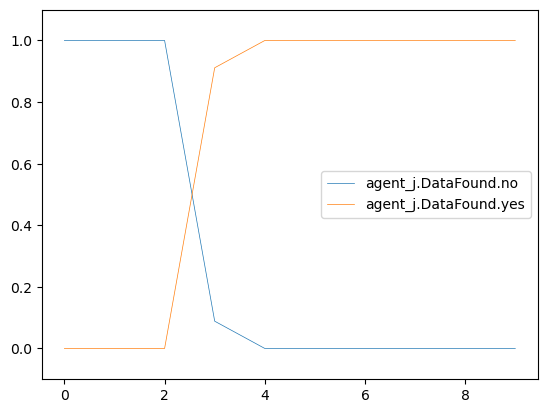

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0      DecoyAccount    EnumAccounts
1                0.0                 1.0  DeployDataDecoys      PrivEscAcc
2                0.0                 1.0               Nop       FileRecon
3                0.0                 1.0               Nop  ManipulateData
4                0.0                 1.0               Nop            Exit
5                0.0                 1.0               Nop             Nop
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

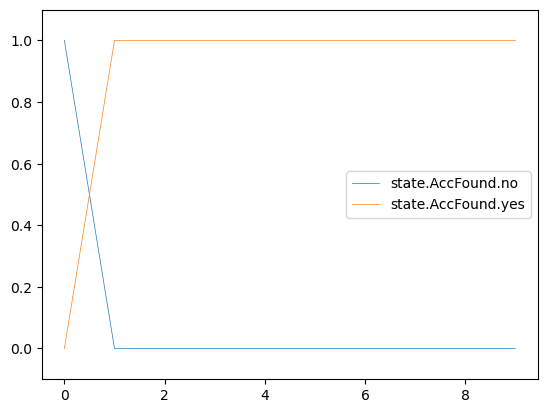

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000      DecoyAccount   
1             0.510051              0.489949  DeployDataDecoys   
2             0.020308              0.979692               Nop   
3             0.019212              0.980788               Nop   
4             0.010720              0.989280               Nop   
5             0.009395              0.990605               Nop   
6             0.009628              0.990371               Nop   
7             0.009629              0.990371               Nop   
8             0.009629              0.990371               Nop   
9             0.009629              0.990371               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                         su_login  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                       file_write  
9             Nop                             none

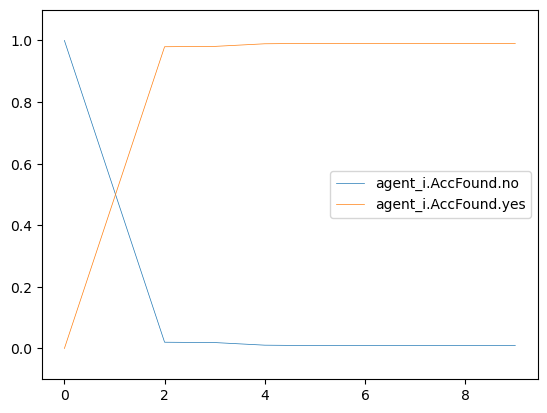

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0         1.000000e+00              0.000000    EnumAccounts   
1         1.121076e-03              0.998879      PrivEscAcc   
2         1.123457e-06              0.999999       FileRecon   
3         6.683859e-07              0.999999  ManipulateData   
4         5.618458e-07              0.999999            Exit   
5         5.618458e-07              1.000000             Nop   
6         5.618458e-07              1.000000             Nop   
7         5.618458e-07              1.000000             Nop   
8         5.618459e-07              1.000000             Nop   
9         5.618459e-07              1.000000             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           success   
3               Nop                           success   
4               Nop                           failure   
5               Nop                           success   
6               Nop                           failure   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

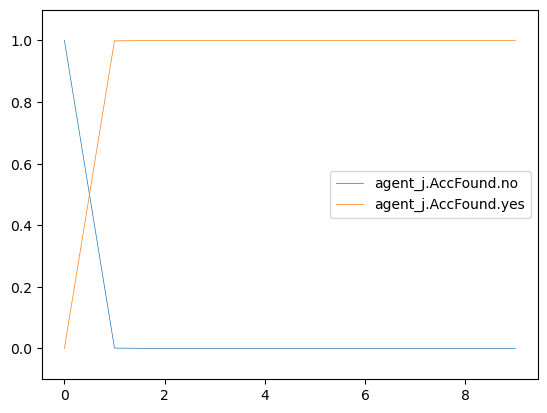

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                         su_login
2                               1.0                        file_enum
3                               1.0                       file_write
4                               1.0                             none
5                               1.0                             none
6                               1.0                       file_write
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

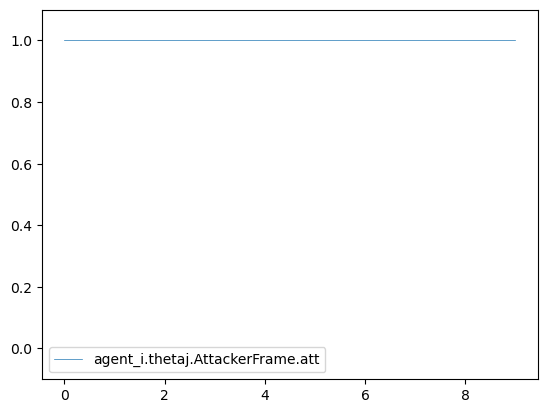

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.333333                        0.666667   
2                         0.333333                        0.666667   
3                         0.468354                        0.531646   
4                         0.499965                        0.500035   
5                         0.499965                        0.500035   
6                         0.499965                        0.500035   
7                         0.499965                        0.500035   
8                         0.499965                        0.500035   
9                         0.499965                        0.500035   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                     inactive  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

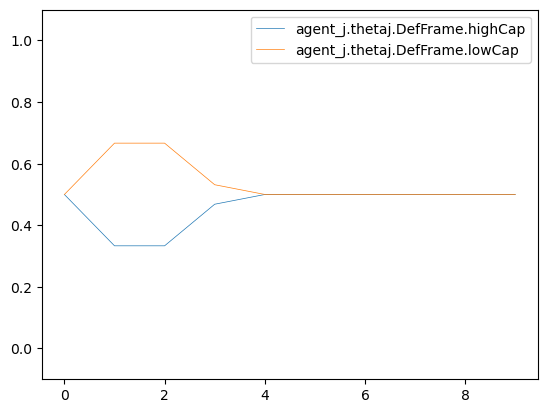

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0      DecoyAccount   
1                   0.0                    1.0  DeployDataDecoys   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

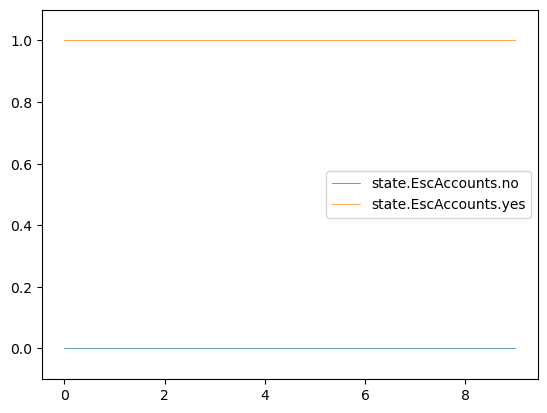

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0  DeployDataDecoys   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

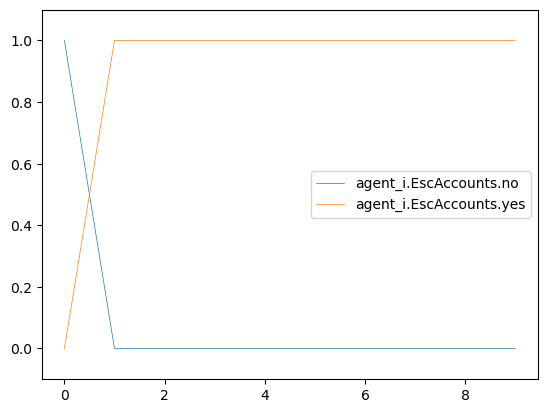

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                     0.0                      1.0    EnumAccounts   
1                     0.0                      1.0      PrivEscAcc   
2                     0.0                      1.0       FileRecon   
3                     0.0                      1.0  ManipulateData   
4                     0.0                      1.0            Exit   
5                     0.0                      1.0             Nop   
6                     0.0                      1.0             Nop   
7                     0.0                      1.0             Nop   
8                     0.0                      1.0             Nop   
9                     0.0                      1.0             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           success   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

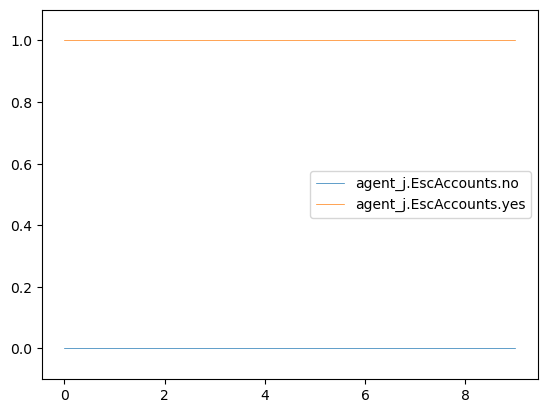

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0      DecoyAccount   
1                    1.0                     0.0  DeployDataDecoys   
2                    1.0                     0.0               Nop   
3                    1.0                     0.0               Nop   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

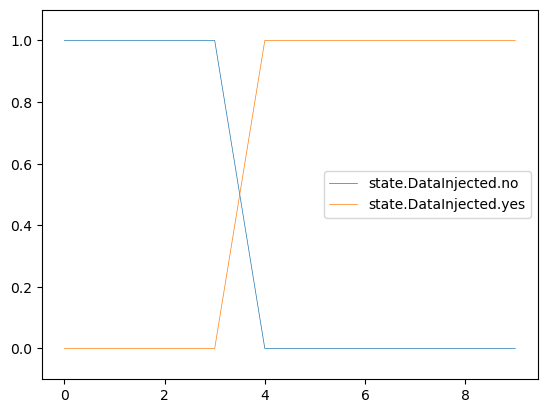

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000  DeployDataDecoys   
2                 1.000000                  0.000000               Nop   
3                 1.000000                  0.000000               Nop   
4                 0.031965                  0.968035               Nop   
5                 0.000651                  0.999349               Nop   
6                 0.000272                  0.999728               Nop   
7                 0.000271                  0.999729               Nop   
8                 0.000271                  0.999729               Nop   
9                 0.000271                  0.999729               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

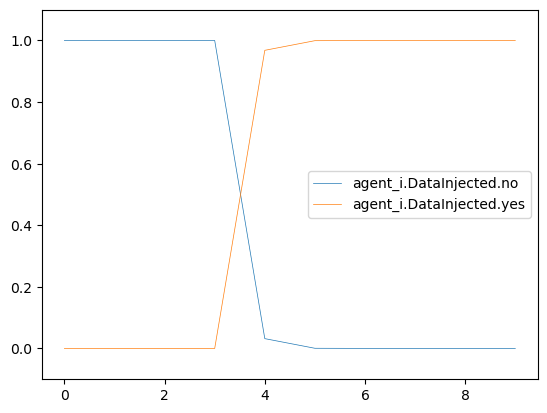

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000    EnumAccounts   
1                 1.000000                  0.000000      PrivEscAcc   
2                 1.000000                  0.000000       FileRecon   
3                 1.000000                  0.000000  ManipulateData   
4                 0.000097                  0.999903            Exit   
5                 0.000097                  0.999903             Nop   
6                 0.000097                  0.999903             Nop   
7                 0.000097                  0.999903             Nop   
8                 0.000097                  0.999903             Nop   
9                 0.000097                  0.999903             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           success   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

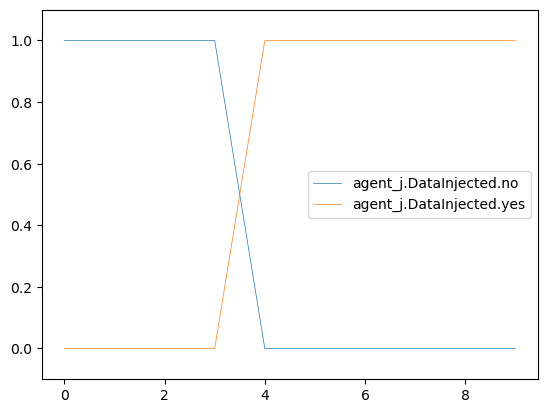

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  DeployDataDecoys   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

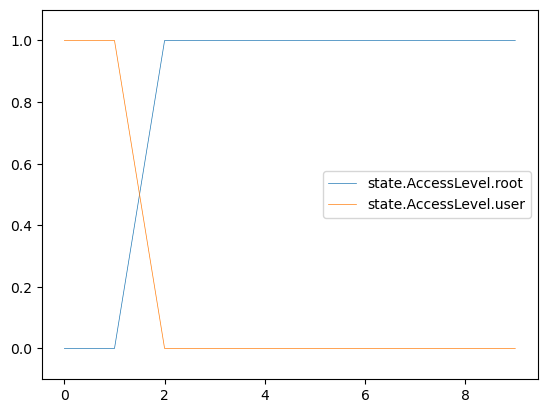

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.500000                  0.500000      DecoyAccount   
1                  0.500000                  0.500000  DeployDataDecoys   
2                  0.989999                  0.010001               Nop   
3                  0.990092                  0.009908               Nop   
4                  0.998529                  0.001470               Nop   
5                  0.999980                  0.000020               Nop   
6                  0.999998                  0.000002               Nop   
7                  0.999998                  0.000002               Nop   
8                  0.999998                  0.000002               Nop   
9                  0.999998                  0.000002               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

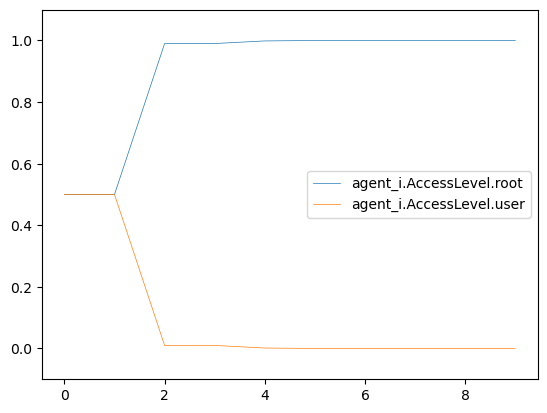

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000              1.000000e+00    EnumAccounts   
1                  0.000000              1.000000e+00      PrivEscAcc   
2                  0.999999              1.123457e-06       FileRecon   
3                  0.999999              6.683859e-07  ManipulateData   
4                  0.999999              5.618458e-07            Exit   
5                  1.000000              5.618458e-07             Nop   
6                  1.000000              5.618458e-07             Nop   
7                  1.000000              5.618458e-07             Nop   
8                  1.000000              5.618459e-07             Nop   
9                  1.000000              5.618459e-07             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           success   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

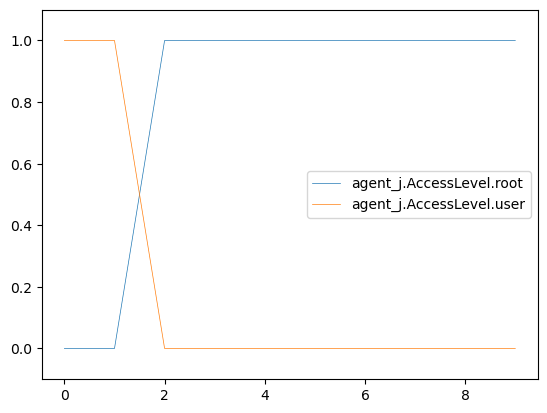

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0      DecoyAccount    EnumAccounts  
1                      1.0  DeployDataDecoys      PrivEscAcc  
2                      1.0               Nop       FileRecon  
3                      1.0               Nop  ManipulateData  
4                      1.0               Nop            Exit  
5                      1.0               Nop             Nop  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

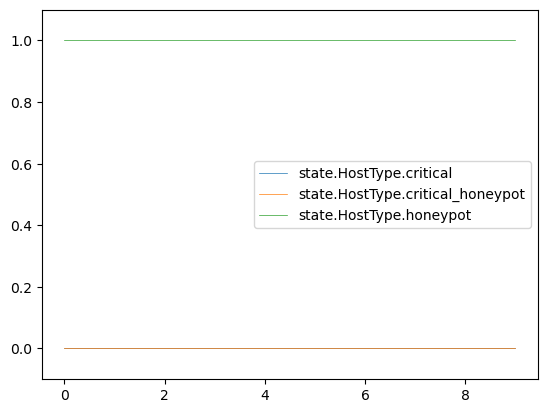

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0      DecoyAccount    EnumAccounts   
1                        1.0  DeployDataDecoys      PrivEscAcc   
2                        1.0               Nop       FileRecon   
3                        1.0               Nop  ManipulateData   
4                        1.0               Nop            Exit   
5                        1.0               Nop             Nop   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                         su_login  
2                        file_enum  
3                       file_write  
4                             none  
5                             none  
6                       file_write  
7                             none  
8                             none  
9                             none

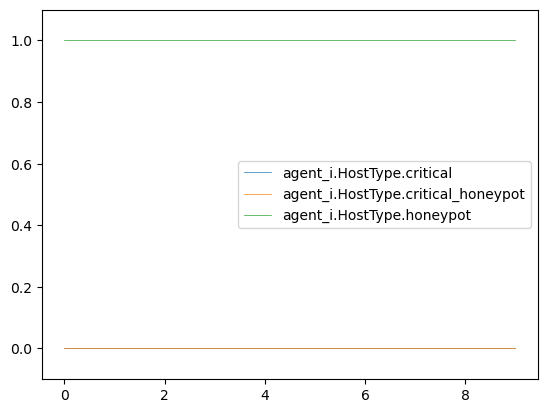

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.333333                                 0.0   
2                   0.333333                                 0.0   
3                   0.468354                                 0.0   
4                   0.499965                                 0.0   
5                   0.499965                                 0.0   
6                   0.499965                                 0.0   
7                   0.499965                                 0.0   
8                   0.499965                                 0.0   
9                   0.499965                                 0.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                   0.500000    EnumAccounts      DecoyAccount   
1                   0.666667      PrivEscAcc  DeployDataDecoys   
2                   0.666667       FileRecon               Nop   
3                   0.531646  ManipulateData               Nop   
4                   0.500035            Exit               Nop   
5                   0.500035             Nop               Nop   
6                   0.500035             Nop               Nop   
7                   0.500035             Nop               Nop   
8                   0.500035             Nop               Nop   
9                   0.500035             Nop               Nop   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                     inactive  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

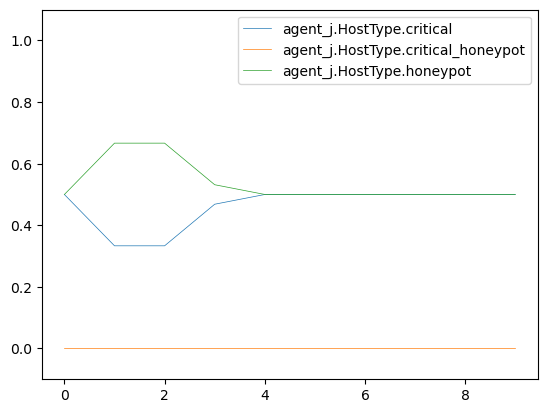

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0      DecoyAccount    EnumAccounts
1                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
2                 0.0                  1.0               Nop       FileRecon
3                 0.0                  1.0               Nop  ManipulateData
4                 0.0                  1.0               Nop            Exit
5                 1.0                  0.0               Nop             Nop
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

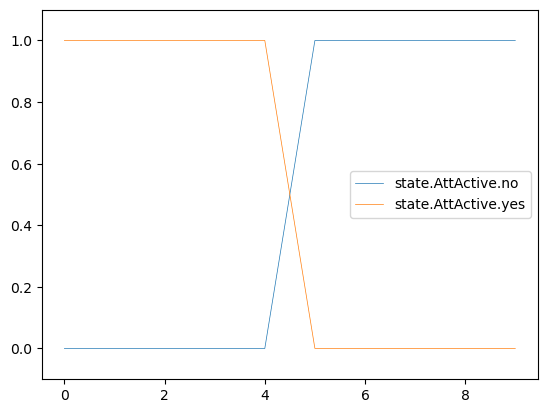

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01           5.000000e-01      DecoyAccount   
1          1.020408e-02           9.897959e-01  DeployDataDecoys   
2          2.103492e-04           9.997897e-01               Nop   
3          2.181504e-06           9.999979e-01               Nop   
4          6.134577e-07           9.999993e-01               Nop   
5          9.995672e-01           4.327344e-04               Nop   
6          9.999949e-01           5.051192e-06               Nop   
7          9.999953e-01           4.692950e-06               Nop   
8          1.000000e+00           1.818016e-10               Nop   
9          1.000000e+00           9.304122e-13               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

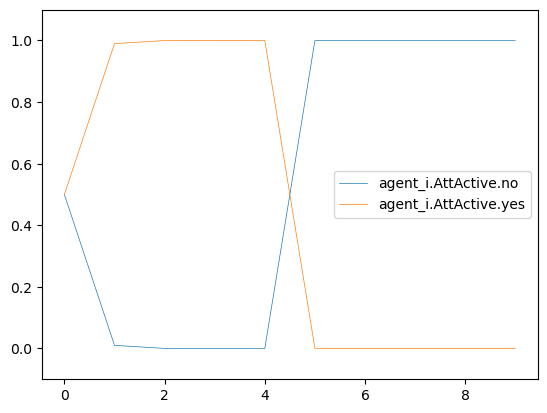

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0      PrivEscAcc   
2                   0.0                    1.0       FileRecon   
3                   0.0                    1.0  ManipulateData   
4                   0.0                    1.0            Exit   
5                   1.0                    0.0             Nop   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           success   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

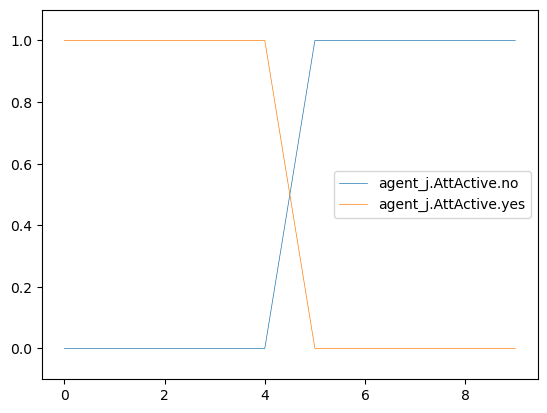

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0      DecoyAccount   
1                   1.0                   0.0  DeployDataDecoys   
2                   1.0                   0.0               Nop   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

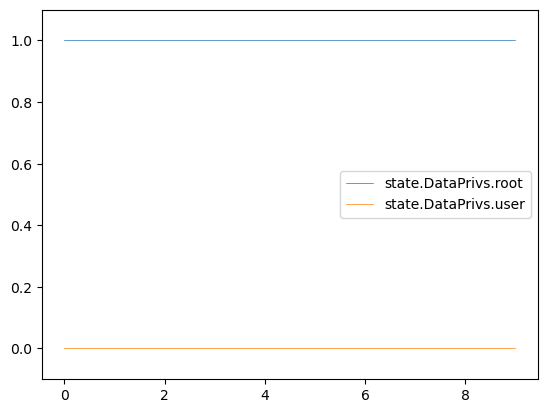

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0      DecoyAccount   
1                     1.0                     0.0  DeployDataDecoys   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

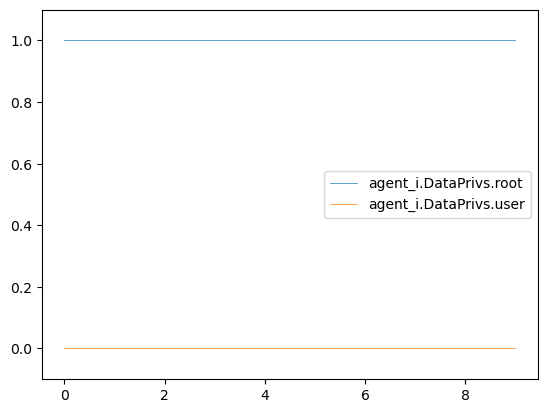

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                     0.5                     0.5    EnumAccounts   
1                     0.5                     0.5      PrivEscAcc   
2                     0.5                     0.5       FileRecon   
3                     0.5                     0.5  ManipulateData   
4                     0.5                     0.5            Exit   
5                     0.5                     0.5             Nop   
6                     0.5                     0.5             Nop   
7                     0.5                     0.5             Nop   
8                     0.5                     0.5             Nop   
9                     0.5                     0.5             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           success   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

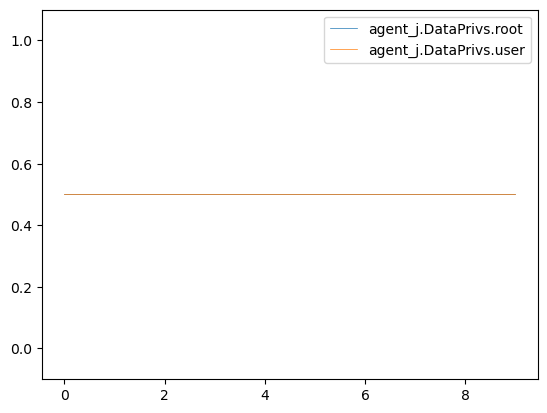

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0      DecoyAccount   
1                   1.0                    0.0  DeployDataDecoys   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

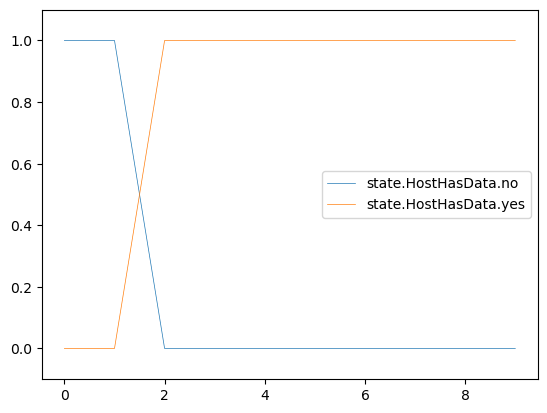

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0      DecoyAccount   
1                     1.0                      0.0  DeployDataDecoys   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

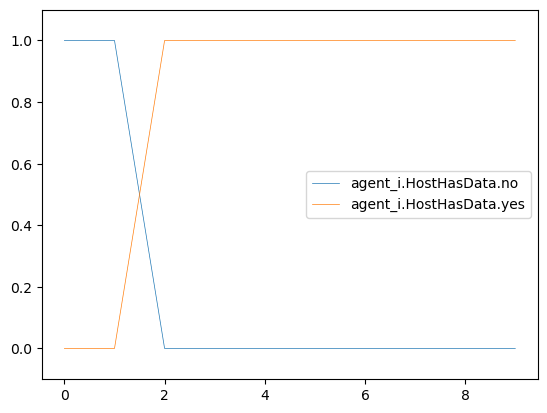

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.333333                 0.666667      PrivEscAcc   
2                0.333333                 0.666667       FileRecon   
3                0.063291                 0.936709  ManipulateData   
4                0.000070                 0.999930            Exit   
5                0.000070                 0.999931             Nop   
6                0.000070                 0.999931             Nop   
7                0.000070                 0.999931             Nop   
8                0.000070                 0.999931             Nop   
9                0.000070                 0.999931             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           success   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

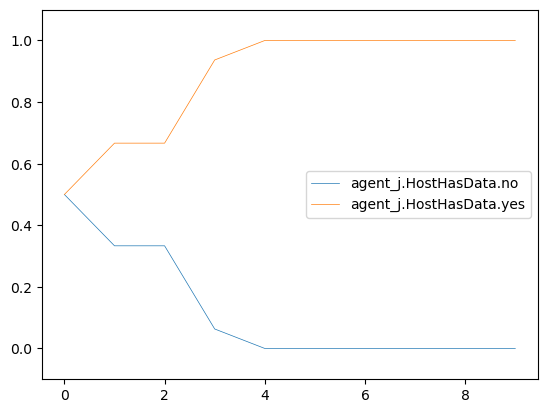

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0      DecoyAccount    EnumAccounts
1                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
2                 1.0                  0.0               Nop       FileRecon
3                 0.0                  1.0               Nop  ManipulateData
4                 0.0                  1.0               Nop            Exit
5                 0.0                  1.0               Nop             Nop
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

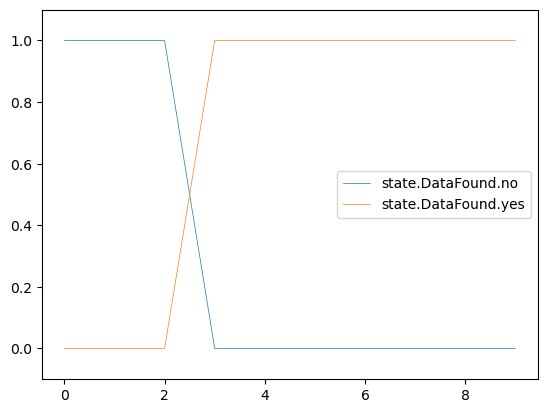

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000      DecoyAccount   
1              1.000000               0.000000  DeployDataDecoys   
2              1.000000               0.000000               Nop   
3              0.207935               0.792065               Nop   
4              0.028862               0.971138               Nop   
5              0.000358               0.999642               Nop   
6              0.000267               0.999733               Nop   
7              0.000267               0.999733               Nop   
8              0.000267               0.999733               Nop   
9              0.000267               0.999733               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

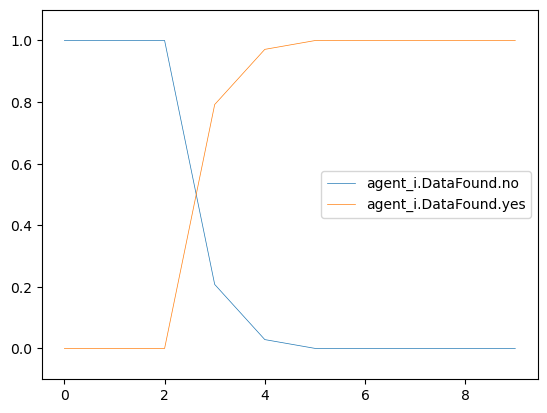

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000    EnumAccounts   
1              1.000000               0.000000      PrivEscAcc   
2              1.000000               0.000000       FileRecon   
3              0.088608               0.911392  ManipulateData   
4              0.000097               0.999903            Exit   
5              0.000097               0.999903             Nop   
6              0.000097               0.999903             Nop   
7              0.000097               0.999903             Nop   
8              0.000097               0.999903             Nop   
9              0.000097               0.999903             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           success   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

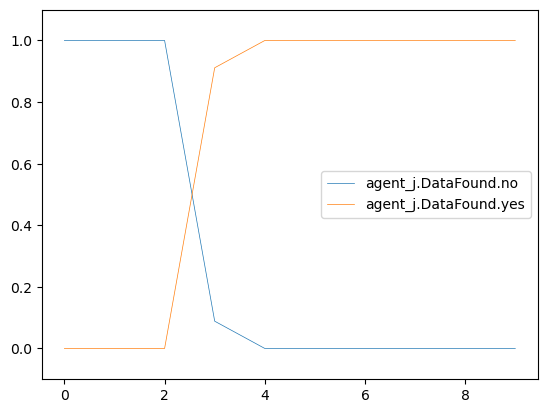

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0      DecoyAccount    EnumAccounts
1                0.0                 1.0  DeployDataDecoys      PrivEscAcc
2                0.0                 1.0               Nop       FileRecon
3                0.0                 1.0               Nop  ManipulateData
4                0.0                 1.0               Nop            Exit
5                0.0                 1.0               Nop             Nop
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

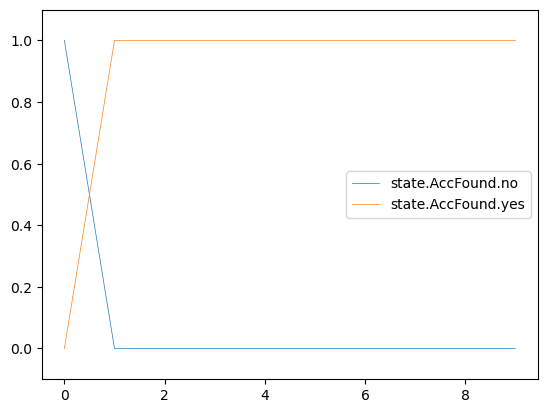

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000      DecoyAccount   
1             0.510051              0.489949  DeployDataDecoys   
2             0.020308              0.979692               Nop   
3             0.019212              0.980788               Nop   
4             0.010720              0.989280               Nop   
5             0.009630              0.990370               Nop   
6             0.009633              0.990367               Nop   
7             0.009633              0.990367               Nop   
8             0.009633              0.990367               Nop   
9             0.009633              0.990367               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

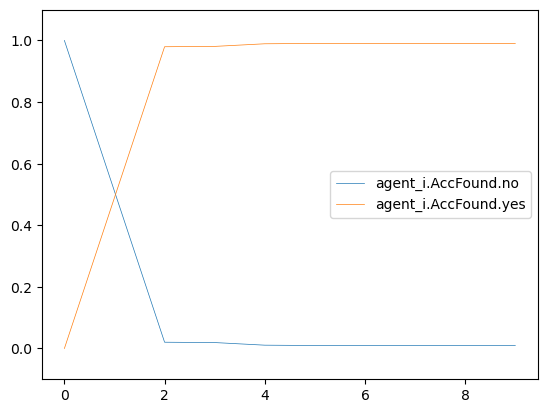

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0         1.000000e+00              0.000000    EnumAccounts   
1         1.121076e-03              0.998879      PrivEscAcc   
2         1.123457e-06              0.999999       FileRecon   
3         6.683859e-07              0.999999  ManipulateData   
4         5.618458e-07              0.999999            Exit   
5         5.618458e-07              1.000000             Nop   
6         5.618458e-07              1.000000             Nop   
7         5.618458e-07              1.000000             Nop   
8         5.618459e-07              1.000000             Nop   
9         5.618459e-07              1.000000             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           success   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

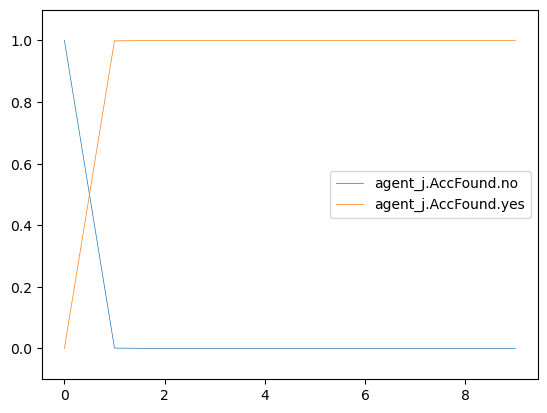

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                             none
1                               1.0                         su_login
2                               1.0                        file_enum
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                       file_write
7                               1.0                             none
8                               1.0                             none
9                               1.0                         su_login

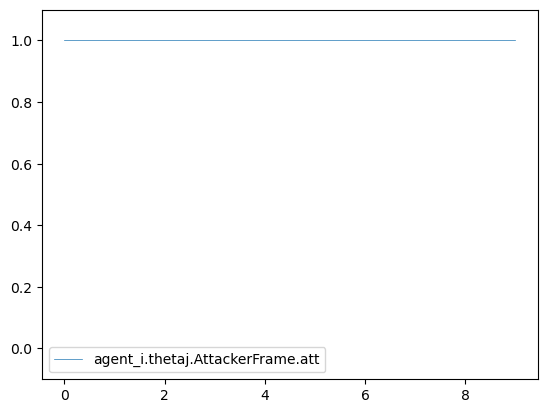

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.333333                        0.666667   
2                         0.333333                        0.666667   
3                         0.183099                        0.816901   
4                         0.410072                        0.589928   
5                         0.499888                        0.500112   
6                         0.499888                        0.500112   
7                         0.499888                        0.500112   
8                         0.499888                        0.500112   
9                         0.499888                        0.500112   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

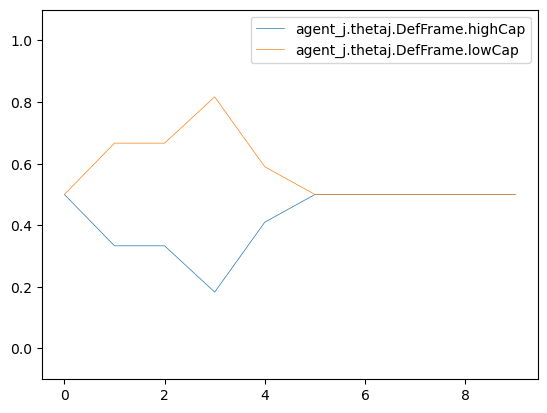

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0      DecoyAccount   
1                   0.0                    1.0               Nop   
2                   0.0                    1.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

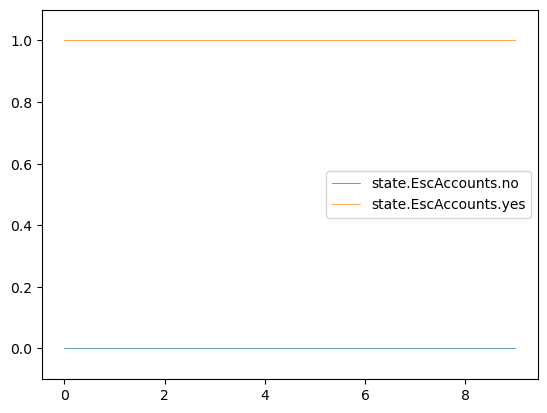

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0               Nop   
2                     0.0                      1.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                             none  
9             Nop                         su_login

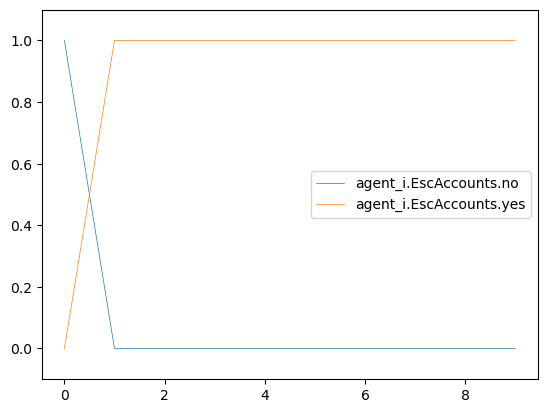

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                     0.0                      1.0    EnumAccounts   
1                     0.0                      1.0      PrivEscAcc   
2                     0.0                      1.0       FileRecon   
3                     0.0                      1.0       FileRecon   
4                     0.0                      1.0  ManipulateData   
5                     0.0                      1.0            Exit   
6                     0.0                      1.0             Nop   
7                     0.0                      1.0             Nop   
8                     0.0                      1.0             Nop   
9                     0.0                      1.0             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1               Nop                           success   
2  DeployDataDecoys                           failure   
3               Nop                           success   
4               Nop                           success   
5               Nop                           success   
6               Nop                           success   
7               Nop                           success   
8               Nop                           failure   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

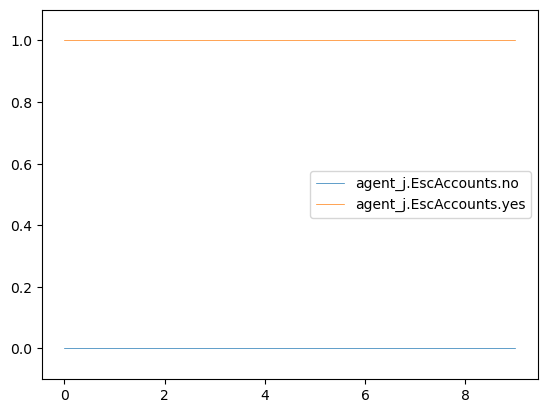

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0      DecoyAccount   
1                    1.0                     0.0               Nop   
2                    1.0                     0.0  DeployDataDecoys   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

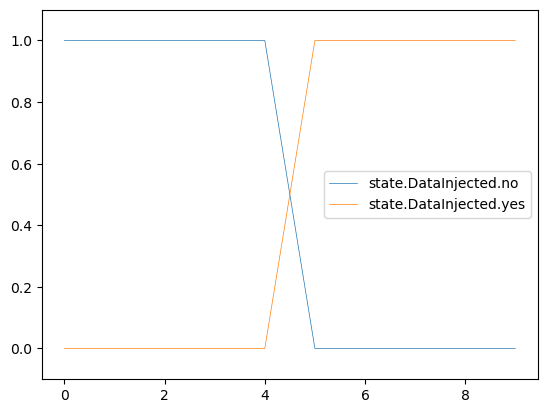

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000               Nop   
2                 1.000000                  0.000000  DeployDataDecoys   
3                 1.000000                  0.000000               Nop   
4                 1.000000                  0.000000               Nop   
5                 0.031313                  0.968687               Nop   
6                 0.002100                  0.997900               Nop   
7                 0.001870                  0.998130               Nop   
8                 0.001870                  0.998130               Nop   
9                 0.001870                  0.998130               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                             none  
9             Nop                         su_login

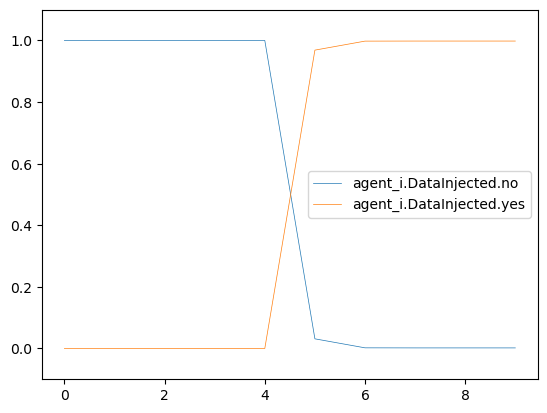

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000    EnumAccounts   
1                 1.000000                  0.000000      PrivEscAcc   
2                 1.000000                  0.000000       FileRecon   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000241                  0.999759            Exit   
6                 0.000241                  0.999759             Nop   
7                 0.000241                  0.999759             Nop   
8                 0.000241                  0.999759             Nop   
9                 0.000241                  0.999759             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1               Nop                           success   
2  DeployDataDecoys                           failure   
3               Nop                           success   
4               Nop                           success   
5               Nop                           success   
6               Nop                           success   
7               Nop                           success   
8               Nop                           failure   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

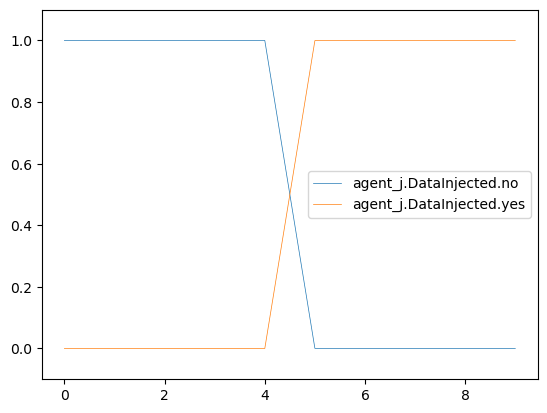

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0               Nop   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

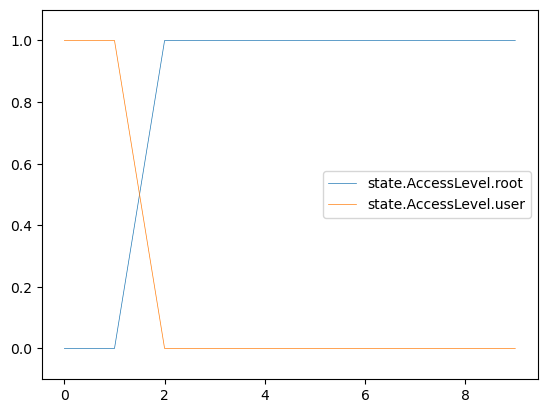

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.500000                  0.500000      DecoyAccount   
1                  0.500000                  0.500000               Nop   
2                  0.689095                  0.310906  DeployDataDecoys   
3                  0.982173                  0.017827               Nop   
4                  0.990001                  0.009999               Nop   
5                  0.999971                  0.000029               Nop   
6                  0.999973                  0.000027               Nop   
7                  0.999973                  0.000027               Nop   
8                  0.999973                  0.000027               Nop   
9                  0.999973                  0.000027               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                             none  
9             Nop                         su_login

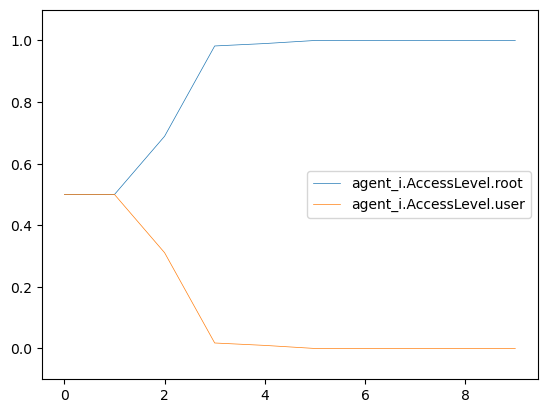

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000              1.000000e+00    EnumAccounts   
1                  0.000000              1.000000e+00      PrivEscAcc   
2                  0.999999              1.123457e-06       FileRecon   
3                  0.999998              1.629803e-06       FileRecon   
4                  0.999999              8.648194e-07  ManipulateData   
5                  0.999999              5.621051e-07            Exit   
6                  0.999999              5.621051e-07             Nop   
7                  0.999999              5.621051e-07             Nop   
8                  1.000000              5.621052e-07             Nop   
9                  1.000000              5.621052e-07             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1               Nop                           success   
2  DeployDataDecoys                           failure   
3               Nop                           success   
4               Nop                           success   
5               Nop                           success   
6               Nop                           success   
7               Nop                           success   
8               Nop                           failure   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

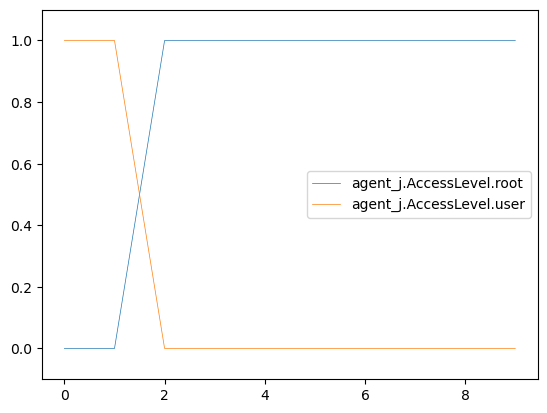

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0      DecoyAccount    EnumAccounts  
1                      1.0               Nop      PrivEscAcc  
2                      1.0  DeployDataDecoys       FileRecon  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop  ManipulateData  
5                      1.0               Nop            Exit  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

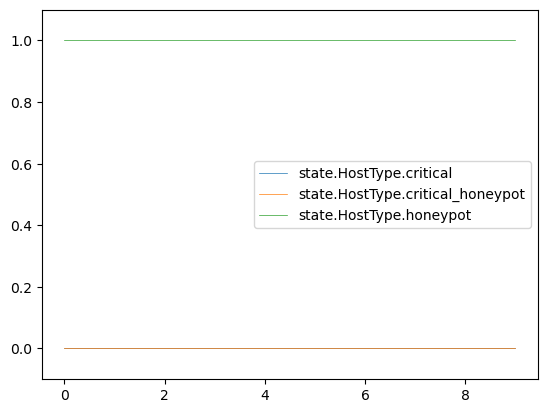

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0      DecoyAccount    EnumAccounts   
1                        1.0               Nop      PrivEscAcc   
2                        1.0  DeployDataDecoys       FileRecon   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop  ManipulateData   
5                        1.0               Nop            Exit   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                             none  
1                         su_login  
2                        file_enum  
3                        file_enum  
4                       file_write  
5                             none  
6                       file_write  
7                             none  
8                             none  
9                         su_login

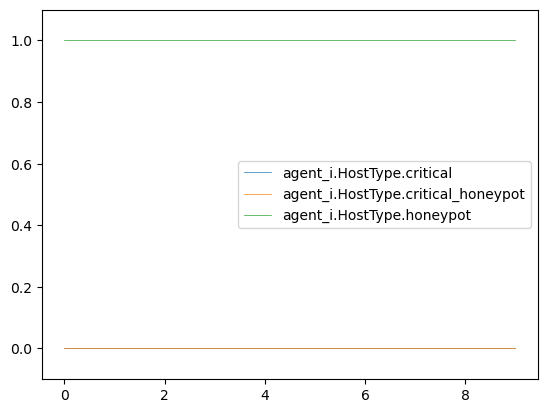

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.333333                                 0.0   
2                   0.333333                                 0.0   
3                   0.183099                                 0.0   
4                   0.410072                                 0.0   
5                   0.499888                                 0.0   
6                   0.499888                                 0.0   
7                   0.499888                                 0.0   
8                   0.499888                                 0.0   
9                   0.499888                                 0.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                   0.500000    EnumAccounts      DecoyAccount   
1                   0.666667      PrivEscAcc               Nop   
2                   0.666667       FileRecon  DeployDataDecoys   
3                   0.816901       FileRecon               Nop   
4                   0.589928  ManipulateData               Nop   
5                   0.500112            Exit               Nop   
6                   0.500112             Nop               Nop   
7                   0.500112             Nop               Nop   
8                   0.500112             Nop               Nop   
9                   0.500112             Nop               Nop   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           success                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           failure                     inactive

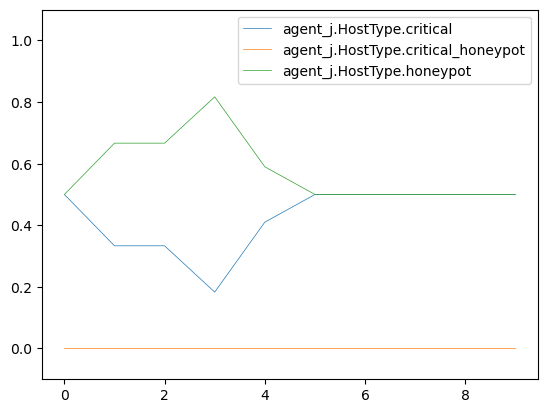

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0      DecoyAccount    EnumAccounts
1                 0.0                  1.0               Nop      PrivEscAcc
2                 0.0                  1.0  DeployDataDecoys       FileRecon
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

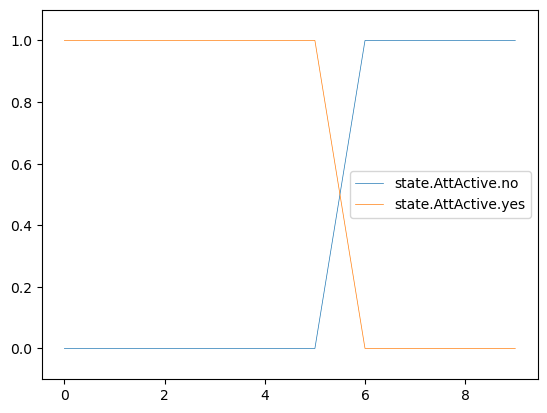

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.500000           5.000000e-01      DecoyAccount   
1              0.987342           1.265823e-02               Nop   
2              0.614173           3.858268e-01  DeployDataDecoys   
3              0.016160           9.838398e-01               Nop   
4              0.000188           9.998121e-01               Nop   
5              0.000659           9.993410e-01               Nop   
6              0.999596           4.042542e-04               Nop   
7              0.998675           1.324778e-03               Nop   
8              1.000000           3.027697e-09               Nop   
9              1.000000           3.532777e-11               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                             none  
9             Nop                         su_login

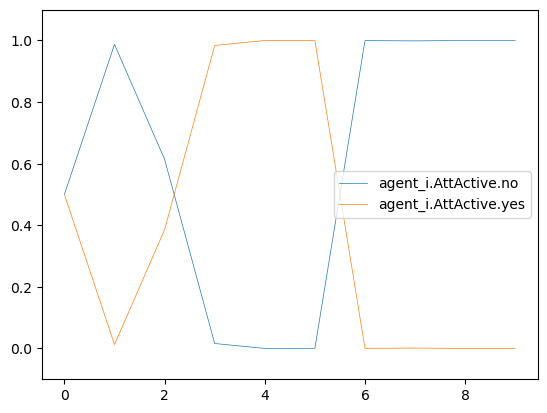

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0      PrivEscAcc   
2                   0.0                    1.0       FileRecon   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1               Nop                           success   
2  DeployDataDecoys                           failure   
3               Nop                           success   
4               Nop                           success   
5               Nop                           success   
6               Nop                           success   
7               Nop                           success   
8               Nop                           failure   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

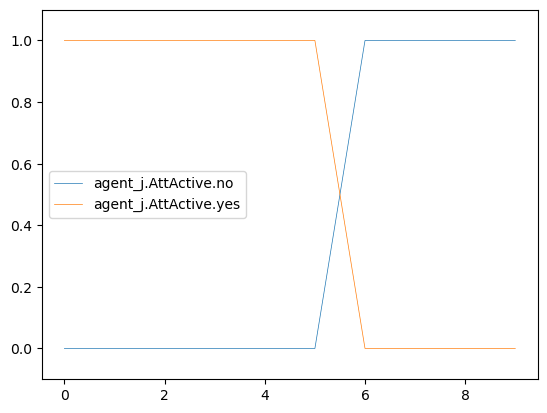

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0      DecoyAccount   
1                   1.0                   0.0               Nop   
2                   1.0                   0.0  DeployDataDecoys   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

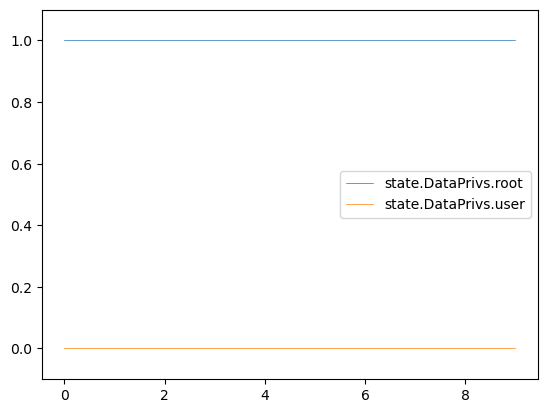

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0      DecoyAccount   
1                     1.0                     0.0               Nop   
2                     1.0                     0.0  DeployDataDecoys   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                             none  
9             Nop                         su_login

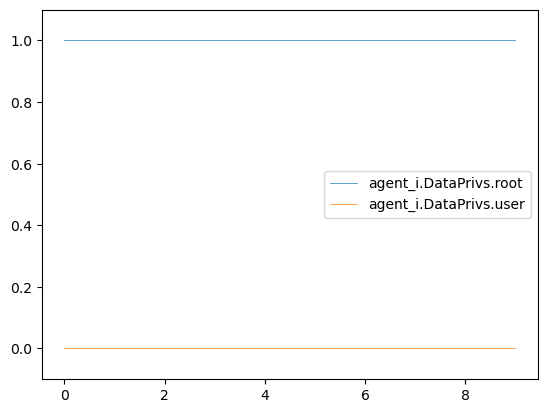

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                     0.5                     0.5    EnumAccounts   
1                     0.5                     0.5      PrivEscAcc   
2                     0.5                     0.5       FileRecon   
3                     0.5                     0.5       FileRecon   
4                     0.5                     0.5  ManipulateData   
5                     0.5                     0.5            Exit   
6                     0.5                     0.5             Nop   
7                     0.5                     0.5             Nop   
8                     0.5                     0.5             Nop   
9                     0.5                     0.5             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1               Nop                           success   
2  DeployDataDecoys                           failure   
3               Nop                           success   
4               Nop                           success   
5               Nop                           success   
6               Nop                           success   
7               Nop                           success   
8               Nop                           failure   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

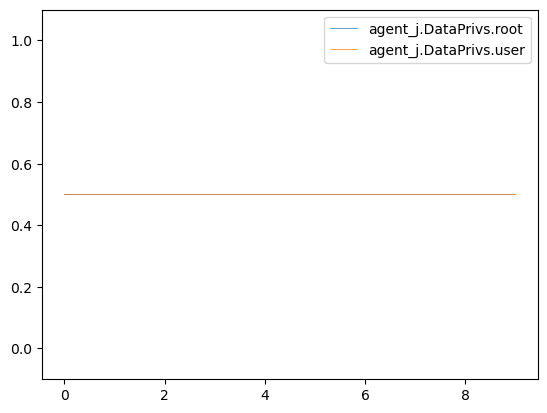

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0      DecoyAccount   
1                   1.0                    0.0               Nop   
2                   1.0                    0.0  DeployDataDecoys   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

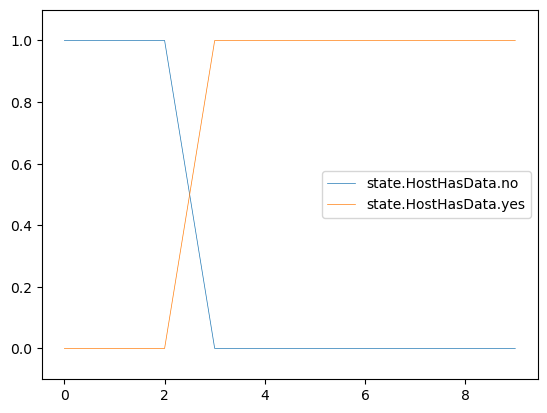

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0      DecoyAccount   
1                     1.0                      0.0               Nop   
2                     1.0                      0.0  DeployDataDecoys   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                             none  
9             Nop                         su_login

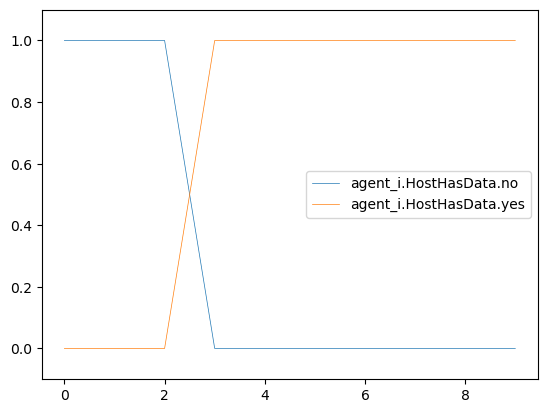

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.333333                 0.666667      PrivEscAcc   
2                0.333333                 0.666667       FileRecon   
3                0.633803                 0.366197       FileRecon   
4                0.179856                 0.820144  ManipulateData   
5                0.000223                 0.999777            Exit   
6                0.000223                 0.999777             Nop   
7                0.000223                 0.999777             Nop   
8                0.000223                 0.999777             Nop   
9                0.000223                 0.999777             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1               Nop                           success   
2  DeployDataDecoys                           failure   
3               Nop                           success   
4               Nop                           success   
5               Nop                           success   
6               Nop                           success   
7               Nop                           success   
8               Nop                           failure   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

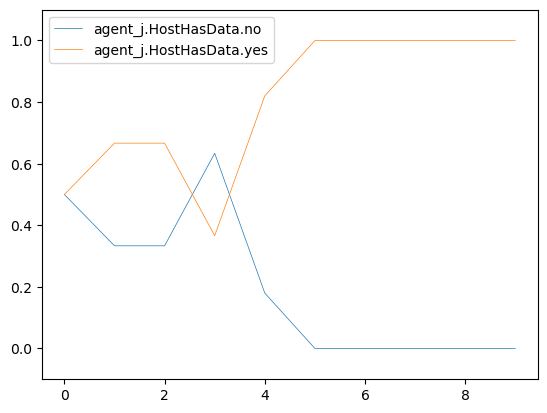

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0      DecoyAccount    EnumAccounts
1                 1.0                  0.0               Nop      PrivEscAcc
2                 1.0                  0.0  DeployDataDecoys       FileRecon
3                 1.0                  0.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

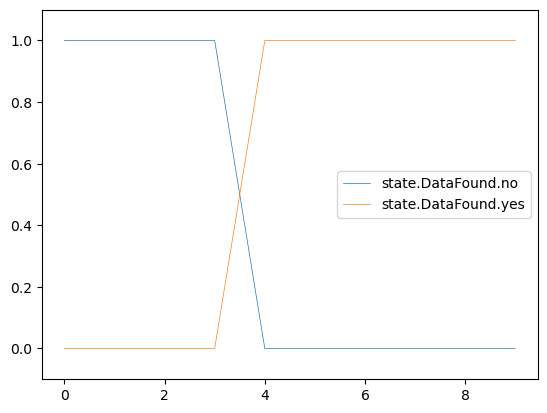

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000      DecoyAccount   
1              1.000000               0.000000               Nop   
2              1.000000               0.000000  DeployDataDecoys   
3              1.000000               0.000000               Nop   
4              0.209764               0.790236               Nop   
5              0.028034               0.971966               Nop   
6              0.001308               0.998692               Nop   
7              0.001333               0.998667               Nop   
8              0.001333               0.998667               Nop   
9              0.001333               0.998667               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                             none  
9             Nop                         su_login

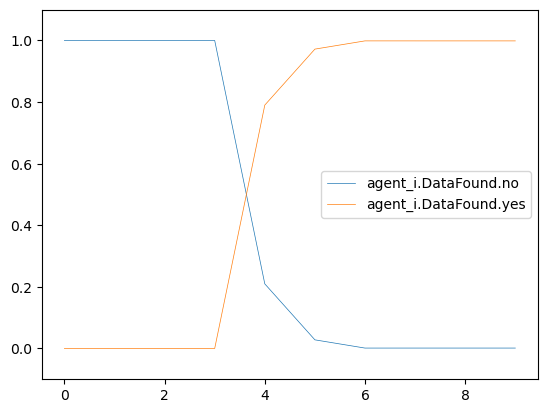

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000    EnumAccounts   
1              1.000000               0.000000      PrivEscAcc   
2              1.000000               0.000000       FileRecon   
3              0.887324               0.112676       FileRecon   
4              0.194245               0.805755  ManipulateData   
5              0.000241               0.999759            Exit   
6              0.000241               0.999759             Nop   
7              0.000241               0.999759             Nop   
8              0.000241               0.999759             Nop   
9              0.000241               0.999759             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1               Nop                           success   
2  DeployDataDecoys                           failure   
3               Nop                           success   
4               Nop                           success   
5               Nop                           success   
6               Nop                           success   
7               Nop                           success   
8               Nop                           failure   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

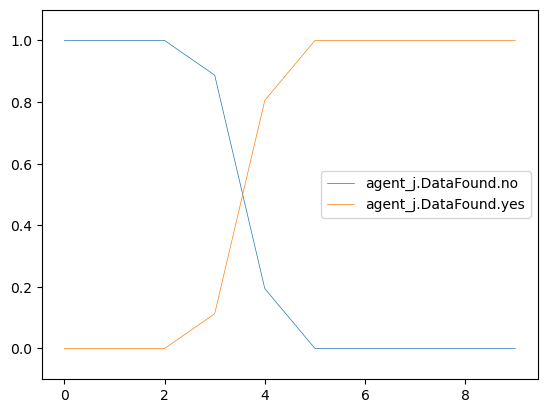

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0      DecoyAccount    EnumAccounts
1                0.0                 1.0               Nop      PrivEscAcc
2                0.0                 1.0  DeployDataDecoys       FileRecon
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop  ManipulateData
5                0.0                 1.0               Nop            Exit
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

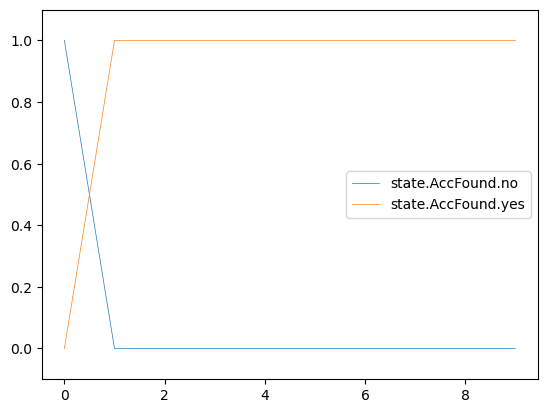

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000      DecoyAccount   
1             0.993734              0.006266               Nop   
2             0.621929              0.378071  DeployDataDecoys   
3             0.035059              0.964941               Nop   
4             0.009610              0.990390               Nop   
5             0.010030              0.989970               Nop   
6             0.010336              0.989664               Nop   
7             0.010325              0.989675               Nop   
8             0.010325              0.989675               Nop   
9             0.010325              0.989675               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                             none  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                       file_write  
7             Nop                             none  
8             Nop                             none  
9             Nop                         su_login

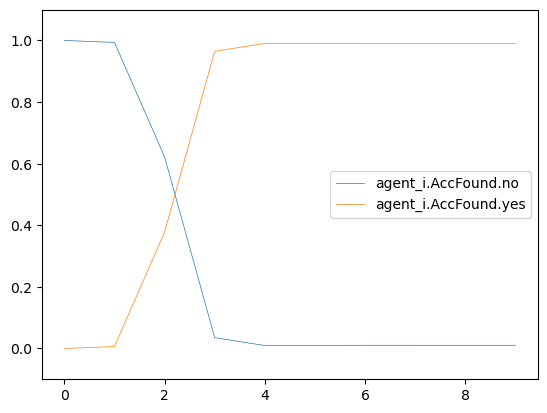

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0         1.000000e+00              0.000000    EnumAccounts   
1         1.121076e-03              0.998879      PrivEscAcc   
2         1.123457e-06              0.999999       FileRecon   
3         1.629803e-06              0.999998       FileRecon   
4         8.648194e-07              0.999999  ManipulateData   
5         5.621051e-07              0.999999            Exit   
6         5.621051e-07              0.999999             Nop   
7         5.621051e-07              0.999999             Nop   
8         5.621052e-07              1.000000             Nop   
9         5.621052e-07              1.000000             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1               Nop                           success   
2  DeployDataDecoys                           failure   
3               Nop                           success   
4               Nop                           success   
5               Nop                           success   
6               Nop                           success   
7               Nop                           success   
8               Nop                           failure   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

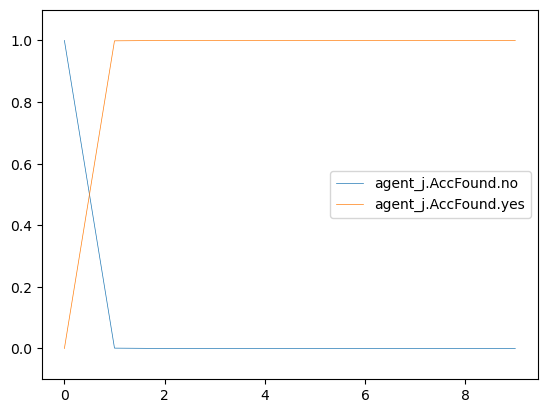

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                        file_enum
1                               1.0                         su_login
2                               1.0                        file_enum
3                               1.0                        file_enum
4                               1.0                       file_write
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

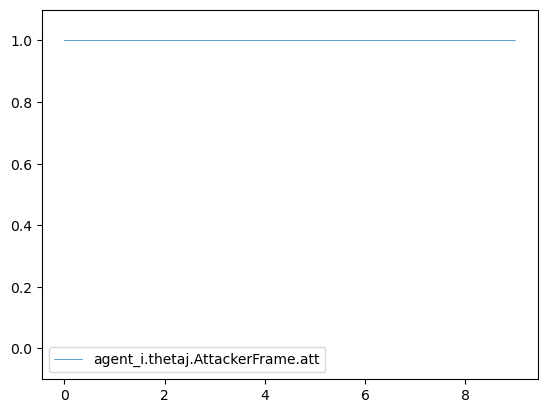

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.333333                        0.666667   
2                         0.333333                        0.666667   
3                         0.183099                        0.816901   
4                         0.410072                        0.589928   
5                         0.499888                        0.500112   
6                         0.499888                        0.500112   
7                         0.499888                        0.500112   
8                         0.499888                        0.500112   
9                         0.499888                        0.500112   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

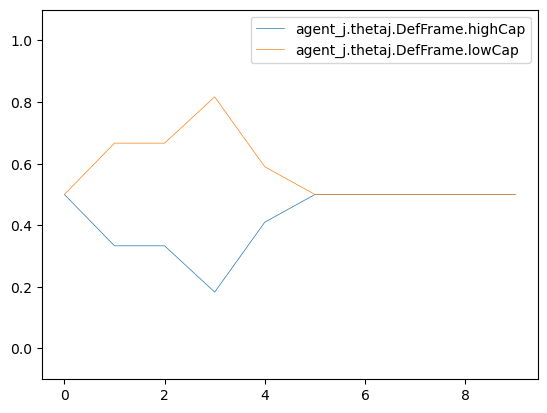

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0      DecoyAccount   
1                   0.0                    1.0  DeployDataDecoys   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

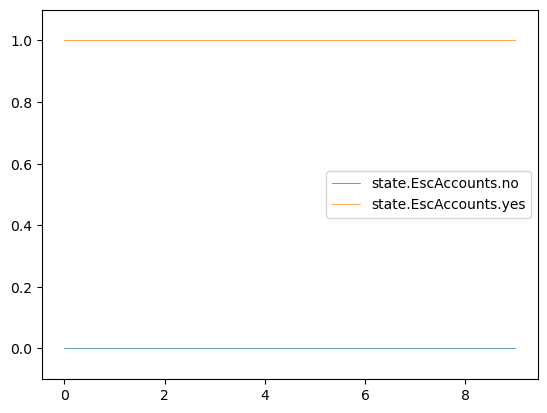

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0  DeployDataDecoys   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

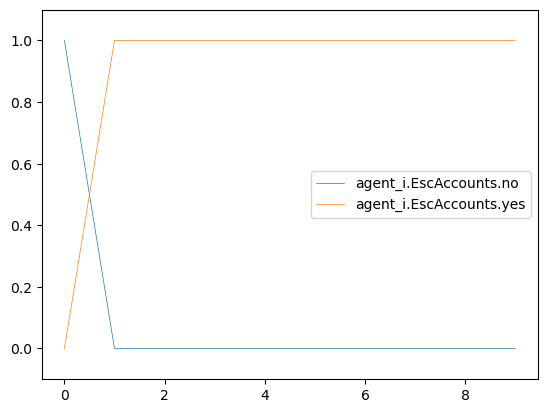

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                     0.0                      1.0    EnumAccounts   
1                     0.0                      1.0      PrivEscAcc   
2                     0.0                      1.0       FileRecon   
3                     0.0                      1.0       FileRecon   
4                     0.0                      1.0  ManipulateData   
5                     0.0                      1.0            Exit   
6                     0.0                      1.0             Nop   
7                     0.0                      1.0             Nop   
8                     0.0                      1.0             Nop   
9                     0.0                      1.0             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           failure   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           success   
7               Nop                           success   
8               Nop                           failure   
9               Nop                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

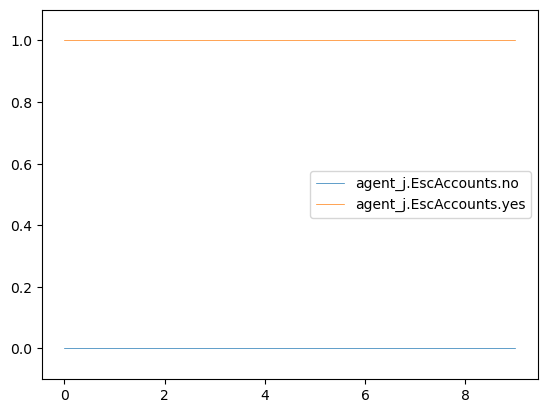

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0      DecoyAccount   
1                    1.0                     0.0  DeployDataDecoys   
2                    1.0                     0.0               Nop   
3                    1.0                     0.0               Nop   
4                    1.0                     0.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

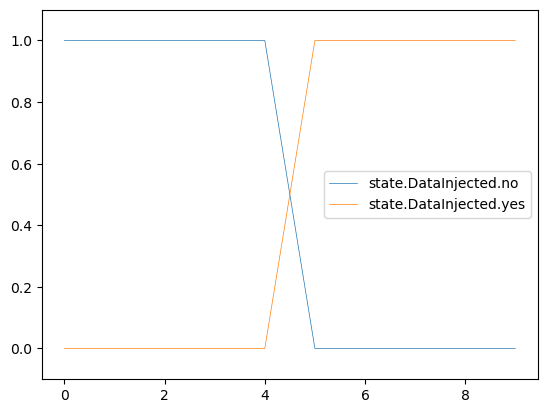

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000  DeployDataDecoys   
2                 1.000000                  0.000000               Nop   
3                 1.000000                  0.000000               Nop   
4                 0.973170                  0.026830               Nop   
5                 0.020984                  0.979016               Nop   
6                 0.001420                  0.998580               Nop   
7                 0.001248                  0.998752               Nop   
8                 0.001248                  0.998752               Nop   
9                 0.001248                  0.998752               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

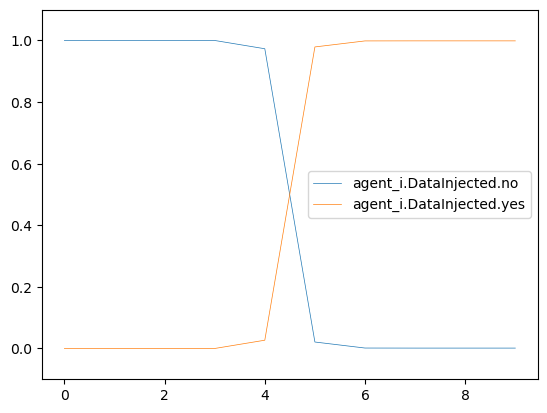

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000    EnumAccounts   
1                 1.000000                  0.000000      PrivEscAcc   
2                 1.000000                  0.000000       FileRecon   
3                 1.000000                  0.000000       FileRecon   
4                 1.000000                  0.000000  ManipulateData   
5                 0.000241                  0.999759            Exit   
6                 0.000241                  0.999759             Nop   
7                 0.000241                  0.999759             Nop   
8                 0.000241                  0.999759             Nop   
9                 0.000241                  0.999759             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           failure   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           success   
7               Nop                           success   
8               Nop                           failure   
9               Nop                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

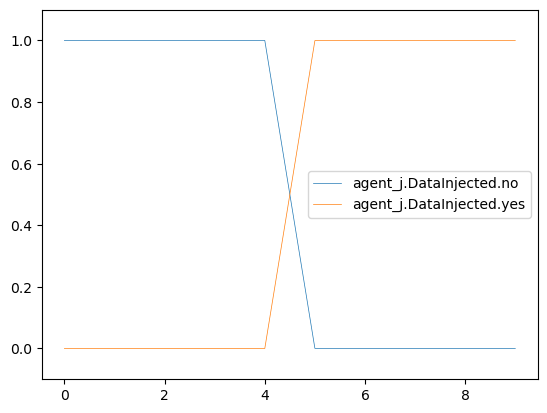

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  DeployDataDecoys   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

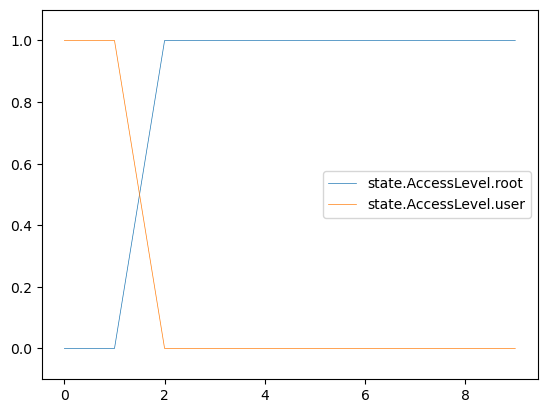

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.500000              5.000000e-01      DecoyAccount   
1                  0.500000              5.000000e-01  DeployDataDecoys   
2                  0.989999              1.000105e-02               Nop   
3                  0.990092              9.908040e-03               Nop   
4                  0.967411              3.258906e-02               Nop   
5                  0.999990              9.756065e-06               Nop   
6                  1.000000              5.127543e-07               Nop   
7                  1.000000              4.493461e-07               Nop   
8                  0.999999              4.485953e-07               Nop   
9                  0.999999              4.485942e-07               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

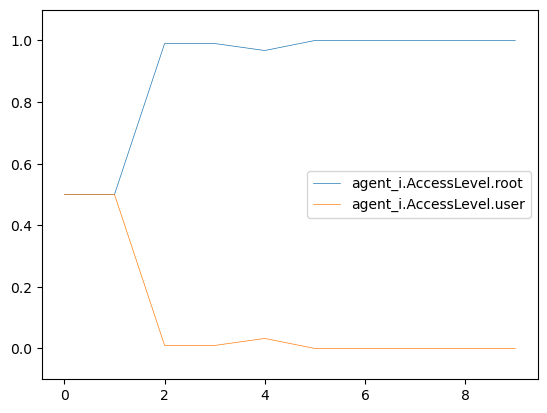

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000              1.000000e+00    EnumAccounts   
1                  0.000000              1.000000e+00      PrivEscAcc   
2                  0.999999              1.123457e-06       FileRecon   
3                  0.999998              1.629803e-06       FileRecon   
4                  0.999999              8.648194e-07  ManipulateData   
5                  0.999999              5.621051e-07            Exit   
6                  0.999999              5.621051e-07             Nop   
7                  0.999999              5.621051e-07             Nop   
8                  1.000000              5.621052e-07             Nop   
9                  1.000000              5.621052e-07             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           failure   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           success   
7               Nop                           success   
8               Nop                           failure   
9               Nop                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

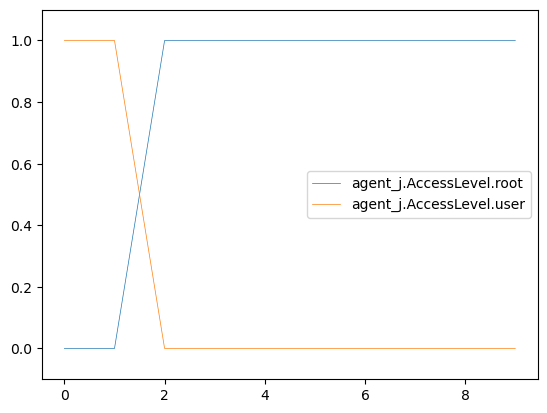

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0      DecoyAccount    EnumAccounts  
1                      1.0  DeployDataDecoys      PrivEscAcc  
2                      1.0               Nop       FileRecon  
3                      1.0               Nop       FileRecon  
4                      1.0               Nop  ManipulateData  
5                      1.0               Nop            Exit  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

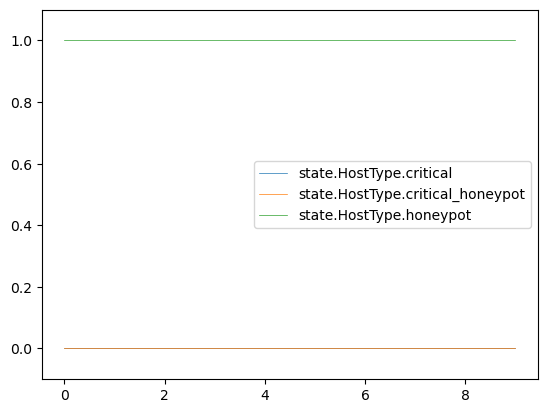

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0      DecoyAccount    EnumAccounts   
1                        1.0  DeployDataDecoys      PrivEscAcc   
2                        1.0               Nop       FileRecon   
3                        1.0               Nop       FileRecon   
4                        1.0               Nop  ManipulateData   
5                        1.0               Nop            Exit   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                        file_enum  
1                         su_login  
2                        file_enum  
3                        file_enum  
4                       file_write  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

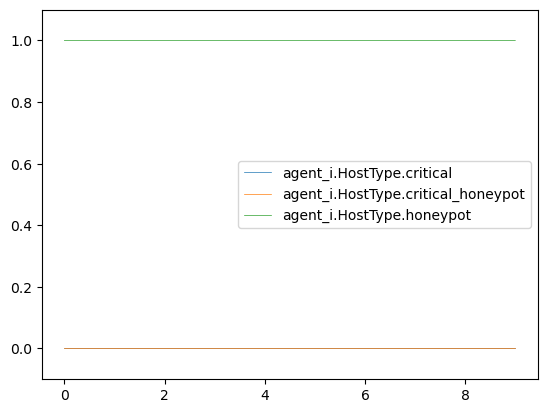

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.333333                                 0.0   
2                   0.333333                                 0.0   
3                   0.183099                                 0.0   
4                   0.410072                                 0.0   
5                   0.499888                                 0.0   
6                   0.499888                                 0.0   
7                   0.499888                                 0.0   
8                   0.499888                                 0.0   
9                   0.499888                                 0.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                   0.500000    EnumAccounts      DecoyAccount   
1                   0.666667      PrivEscAcc  DeployDataDecoys   
2                   0.666667       FileRecon               Nop   
3                   0.816901       FileRecon               Nop   
4                   0.589928  ManipulateData               Nop   
5                   0.500112            Exit               Nop   
6                   0.500112             Nop               Nop   
7                   0.500112             Nop               Nop   
8                   0.500112             Nop               Nop   
9                   0.500112             Nop               Nop   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           failure                       active  
3                           success                       active  
4                           success                       active  
5                           failure                     inactive  
6                           success                     inactive  
7                           success                     inactive  
8                           failure                     inactive  
9                           success                     inactive

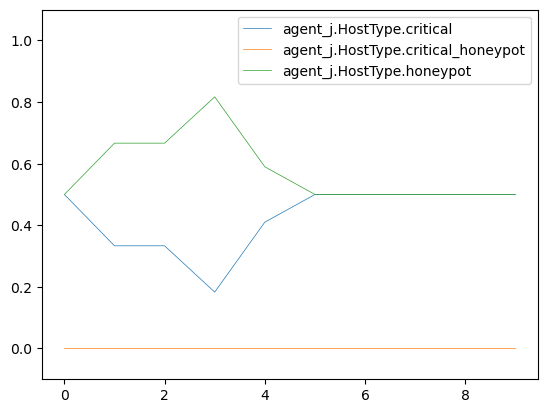

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0      DecoyAccount    EnumAccounts
1                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
2                 0.0                  1.0               Nop       FileRecon
3                 0.0                  1.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

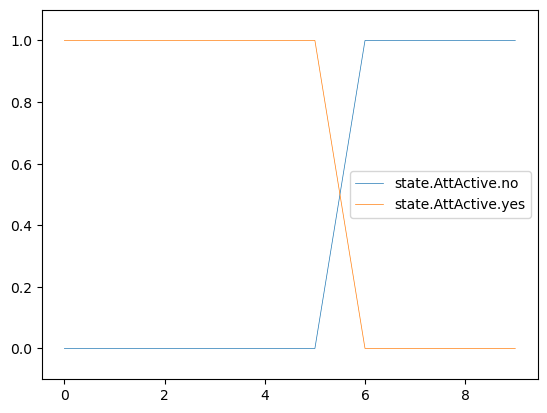

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0          5.000000e-01           5.000000e-01      DecoyAccount   
1          1.020408e-02           9.897959e-01  DeployDataDecoys   
2          2.103492e-04           9.997897e-01               Nop   
3          2.181504e-06           9.999979e-01               Nop   
4          8.246284e-08           9.999997e-01               Nop   
5          7.833368e-03           9.921667e-01               Nop   
6          9.997281e-01           2.720261e-04               Nop   
7          9.999977e-01           2.355665e-06               Nop   
8          9.999999e-01           2.845172e-10               Nop   
9          9.999999e-01           9.867221e-13               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

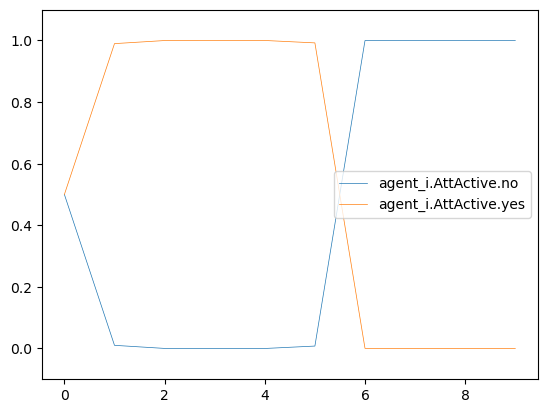

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0      PrivEscAcc   
2                   0.0                    1.0       FileRecon   
3                   0.0                    1.0       FileRecon   
4                   0.0                    1.0  ManipulateData   
5                   0.0                    1.0            Exit   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           failure   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           success   
7               Nop                           success   
8               Nop                           failure   
9               Nop                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

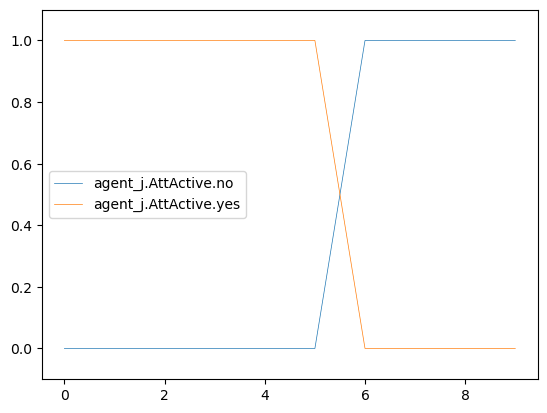

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0      DecoyAccount   
1                   1.0                   0.0  DeployDataDecoys   
2                   1.0                   0.0               Nop   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

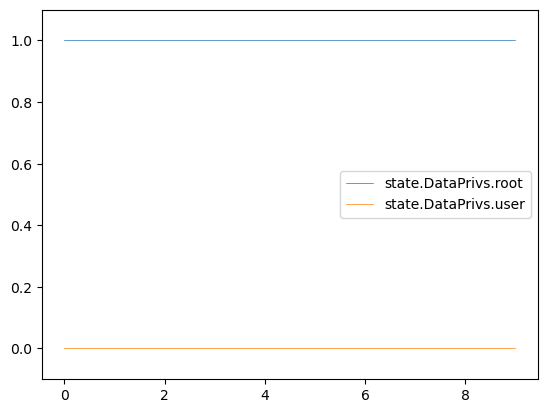

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0      DecoyAccount   
1                     1.0                     0.0  DeployDataDecoys   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

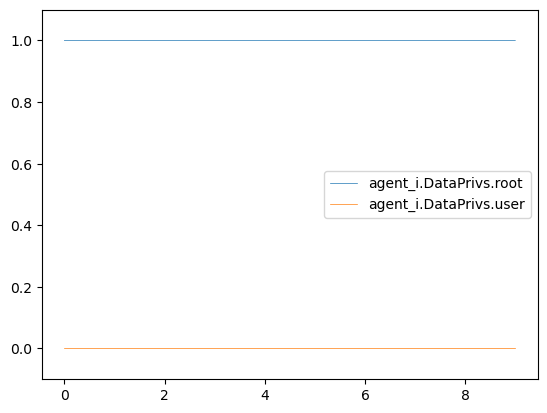

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                     0.5                     0.5    EnumAccounts   
1                     0.5                     0.5      PrivEscAcc   
2                     0.5                     0.5       FileRecon   
3                     0.5                     0.5       FileRecon   
4                     0.5                     0.5  ManipulateData   
5                     0.5                     0.5            Exit   
6                     0.5                     0.5             Nop   
7                     0.5                     0.5             Nop   
8                     0.5                     0.5             Nop   
9                     0.5                     0.5             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           failure   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           success   
7               Nop                           success   
8               Nop                           failure   
9               Nop                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

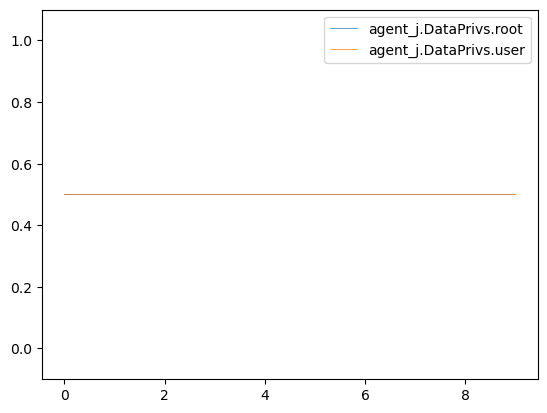

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0      DecoyAccount   
1                   1.0                    0.0  DeployDataDecoys   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3       FileRecon  
4  ManipulateData  
5            Exit  
6             Nop  
7             Nop  
8             Nop  
9             Nop

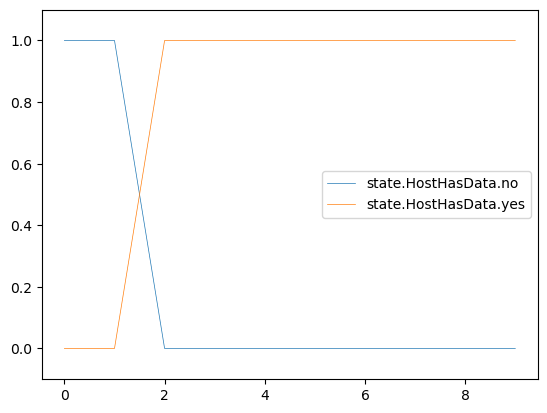

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0      DecoyAccount   
1                     1.0                      0.0  DeployDataDecoys   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

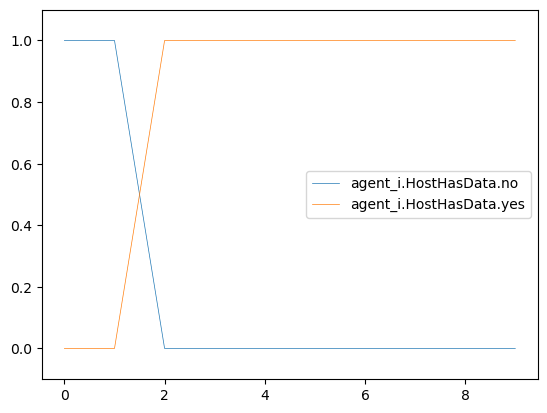

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.333333                 0.666667      PrivEscAcc   
2                0.333333                 0.666667       FileRecon   
3                0.633803                 0.366197       FileRecon   
4                0.179856                 0.820144  ManipulateData   
5                0.000223                 0.999777            Exit   
6                0.000223                 0.999777             Nop   
7                0.000223                 0.999777             Nop   
8                0.000223                 0.999777             Nop   
9                0.000223                 0.999777             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           failure   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           success   
7               Nop                           success   
8               Nop                           failure   
9               Nop                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

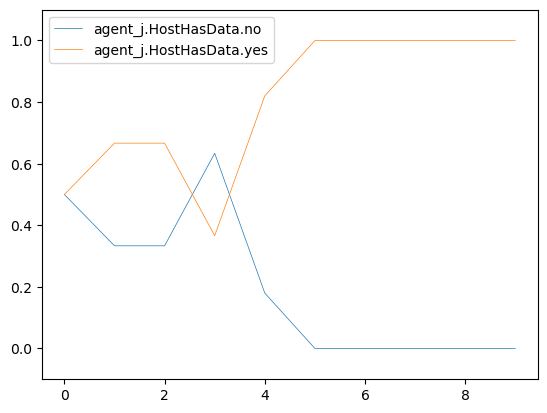

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0      DecoyAccount    EnumAccounts
1                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
2                 1.0                  0.0               Nop       FileRecon
3                 1.0                  0.0               Nop       FileRecon
4                 0.0                  1.0               Nop  ManipulateData
5                 0.0                  1.0               Nop            Exit
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

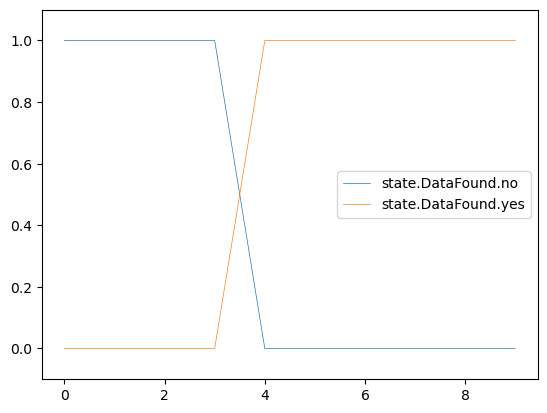

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000      DecoyAccount   
1              1.000000               0.000000  DeployDataDecoys   
2              1.000000               0.000000               Nop   
3              0.207935               0.792065               Nop   
4              0.163983               0.836017               Nop   
5              0.018405               0.981595               Nop   
6              0.000802               0.999198               Nop   
7              0.000797               0.999203               Nop   
8              0.000797               0.999203               Nop   
9              0.000797               0.999203               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

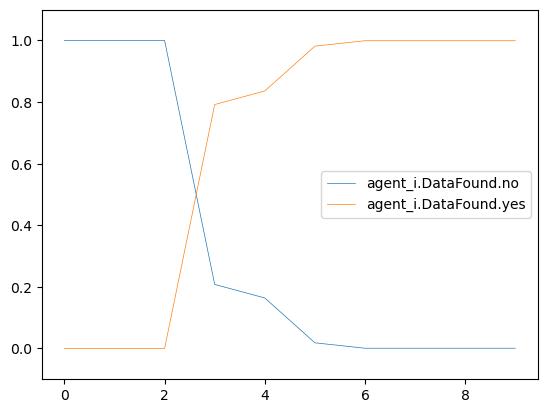

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000    EnumAccounts   
1              1.000000               0.000000      PrivEscAcc   
2              1.000000               0.000000       FileRecon   
3              0.887324               0.112676       FileRecon   
4              0.194245               0.805755  ManipulateData   
5              0.000241               0.999759            Exit   
6              0.000241               0.999759             Nop   
7              0.000241               0.999759             Nop   
8              0.000241               0.999759             Nop   
9              0.000241               0.999759             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           failure   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           success   
7               Nop                           success   
8               Nop                           failure   
9               Nop                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

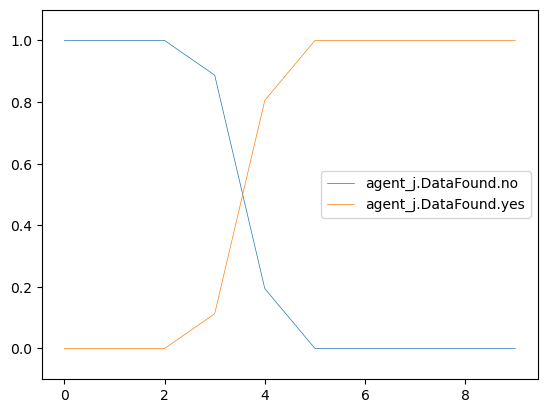

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0      DecoyAccount    EnumAccounts
1                0.0                 1.0  DeployDataDecoys      PrivEscAcc
2                0.0                 1.0               Nop       FileRecon
3                0.0                 1.0               Nop       FileRecon
4                0.0                 1.0               Nop  ManipulateData
5                0.0                 1.0               Nop            Exit
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

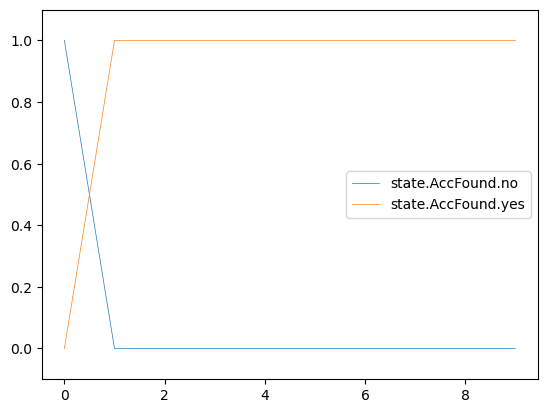

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000      DecoyAccount   
1             0.510051              0.489949  DeployDataDecoys   
2             0.020308              0.979692               Nop   
3             0.019212              0.980788               Nop   
4             0.009510              0.990490               Nop   
5             0.009865              0.990135               Nop   
6             0.010060              0.989940               Nop   
7             0.010062              0.989938               Nop   
8             0.010062              0.989938               Nop   
9             0.010062              0.989938               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                        file_enum  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3       FileRecon                        file_enum  
4  ManipulateData                       file_write  
5            Exit                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

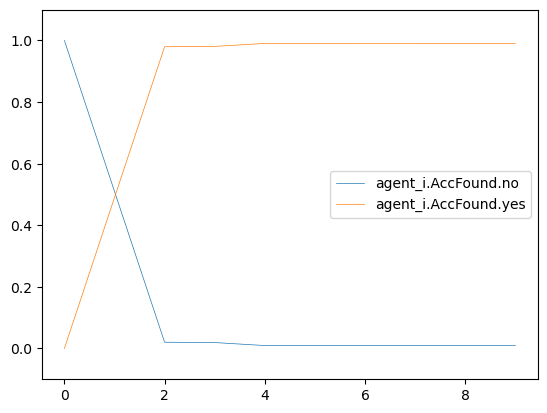

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0         1.000000e+00              0.000000    EnumAccounts   
1         1.121076e-03              0.998879      PrivEscAcc   
2         1.123457e-06              0.999999       FileRecon   
3         1.629803e-06              0.999998       FileRecon   
4         8.648194e-07              0.999999  ManipulateData   
5         5.621051e-07              0.999999            Exit   
6         5.621051e-07              0.999999             Nop   
7         5.621051e-07              0.999999             Nop   
8         5.621052e-07              1.000000             Nop   
9         5.621052e-07              1.000000             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           failure   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           success   
7               Nop                           success   
8               Nop                           failure   
9               Nop                           success   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                       active  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

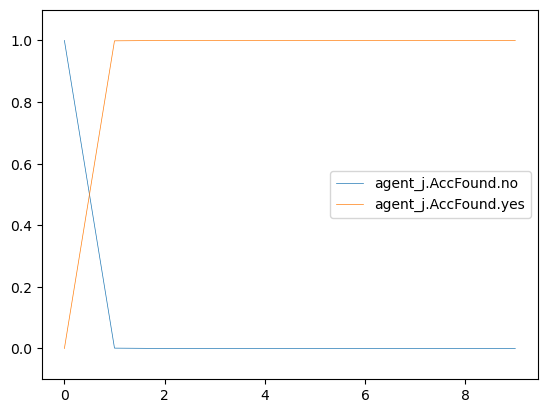

+++++++++++++++++++ End Interaction +++++++++++++++++++
+++++++++++++++++++ Begin Interaction +++++++++++++++++++


agent_i.thetaj.AttackerFrame.att agent_i.observation.EndPtAlerts'
0                               1.0                         su_login
1                               1.0                         su_login
2                               1.0                        file_enum
3                               1.0                       file_write
4                               1.0                             none
5                               1.0                             none
6                               1.0                             none
7                               1.0                             none
8                               1.0                             none
9                               1.0                             none

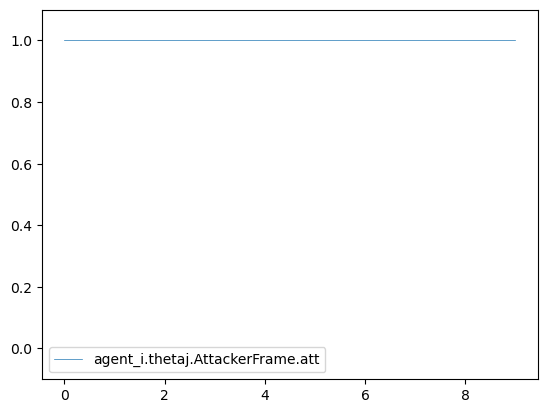

agent_j.thetaj.DefFrame.highCap  agent_j.thetaj.DefFrame.lowCap  \
0                         0.500000                        0.500000   
1                         0.333333                        0.666667   
2                         0.333333                        0.666667   
3                         0.468354                        0.531646   
4                         0.499965                        0.500035   
5                         0.499965                        0.500035   
6                         0.499965                        0.500035   
7                         0.499965                        0.500035   
8                         0.499965                        0.500035   
9                         0.499965                        0.500035   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                     inactive  
5                           failure                     inactive  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

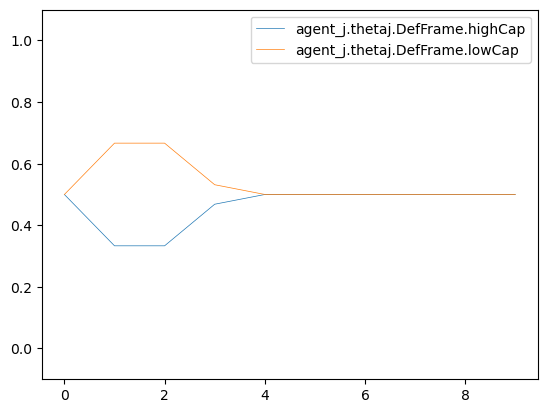

=============EscAccounts============


state.EscAccounts.no  state.EscAccounts.yes    agent_i.action  \
0                   0.0                    1.0      DecoyAccount   
1                   0.0                    1.0  DeployDataDecoys   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

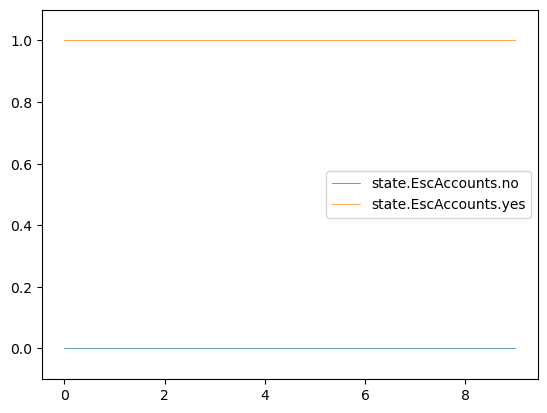

agent_i.EscAccounts.no  agent_i.EscAccounts.yes    agent_i.action  \
0                     1.0                      0.0      DecoyAccount   
1                     0.0                      1.0  DeployDataDecoys   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                         su_login  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

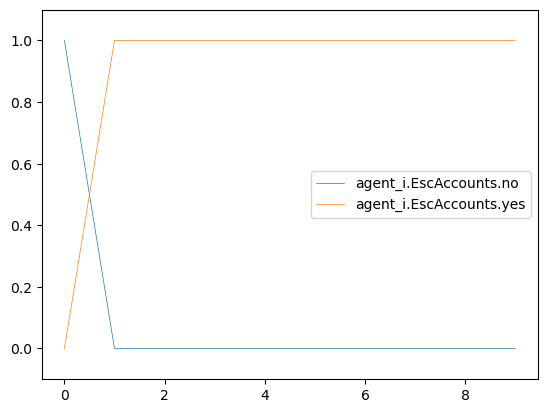

agent_j.EscAccounts.no  agent_j.EscAccounts.yes  agent_j.action  \
0                     0.0                      1.0    EnumAccounts   
1                     0.0                      1.0      PrivEscAcc   
2                     0.0                      1.0       FileRecon   
3                     0.0                      1.0  ManipulateData   
4                     0.0                      1.0            Exit   
5                     0.0                      1.0             Nop   
6                     0.0                      1.0             Nop   
7                     0.0                      1.0             Nop   
8                     0.0                      1.0             Nop   
9                     0.0                      1.0             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           failure   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

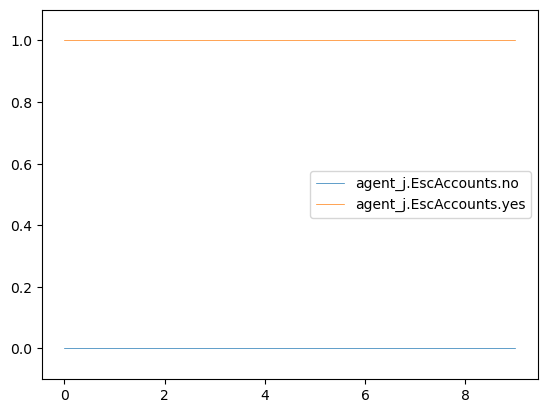

=============DataInjected============


state.DataInjected.no  state.DataInjected.yes    agent_i.action  \
0                    1.0                     0.0      DecoyAccount   
1                    1.0                     0.0  DeployDataDecoys   
2                    1.0                     0.0               Nop   
3                    1.0                     0.0               Nop   
4                    0.0                     1.0               Nop   
5                    0.0                     1.0               Nop   
6                    0.0                     1.0               Nop   
7                    0.0                     1.0               Nop   
8                    0.0                     1.0               Nop   
9                    0.0                     1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

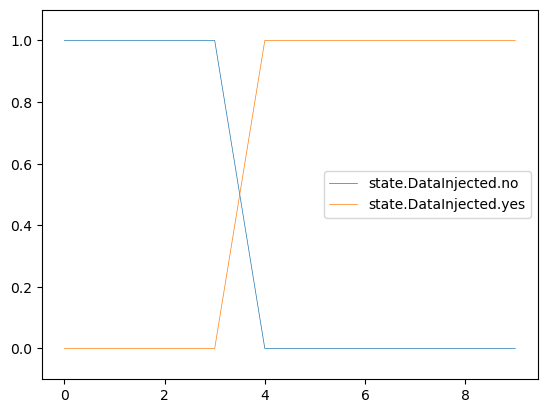

agent_i.DataInjected.no  agent_i.DataInjected.yes    agent_i.action  \
0                 1.000000                  0.000000      DecoyAccount   
1                 1.000000                  0.000000  DeployDataDecoys   
2                 1.000000                  0.000000               Nop   
3                 1.000000                  0.000000               Nop   
4                 0.032021                  0.967979               Nop   
5                 0.000712                  0.999289               Nop   
6                 0.000332                  0.999668               Nop   
7                 0.000331                  0.999669               Nop   
8                 0.000331                  0.999669               Nop   
9                 0.000331                  0.999669               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                         su_login  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

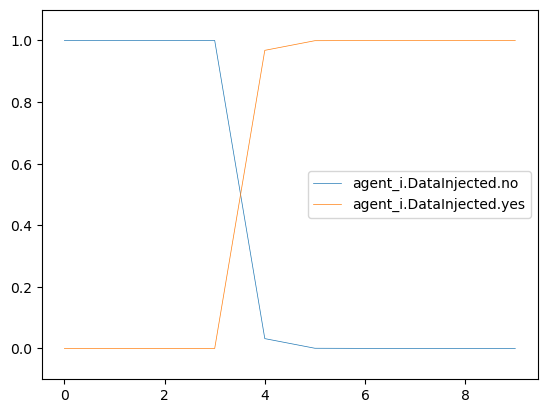

agent_j.DataInjected.no  agent_j.DataInjected.yes  agent_j.action  \
0                 1.000000                  0.000000    EnumAccounts   
1                 1.000000                  0.000000      PrivEscAcc   
2                 1.000000                  0.000000       FileRecon   
3                 1.000000                  0.000000  ManipulateData   
4                 0.000097                  0.999903            Exit   
5                 0.000097                  0.999903             Nop   
6                 0.000097                  0.999903             Nop   
7                 0.000097                  0.999903             Nop   
8                 0.000097                  0.999903             Nop   
9                 0.000097                  0.999903             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           failure   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

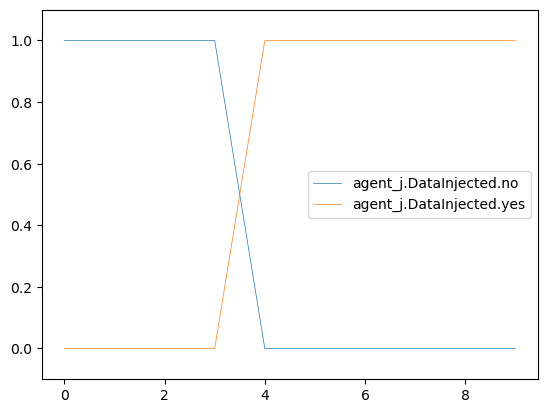

=============AccessLevel============


state.AccessLevel.root  state.AccessLevel.user    agent_i.action  \
0                     0.0                     1.0      DecoyAccount   
1                     0.0                     1.0  DeployDataDecoys   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

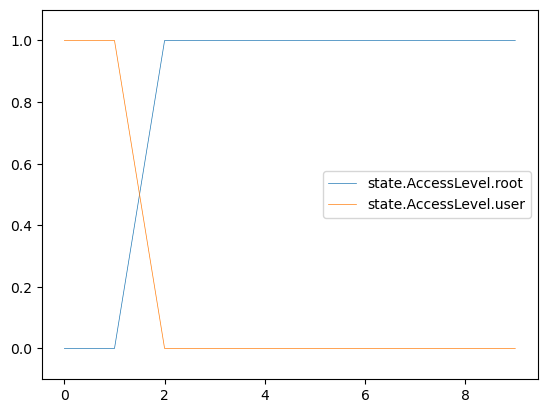

agent_i.AccessLevel.root  agent_i.AccessLevel.user    agent_i.action  \
0                  0.500000                  0.500000      DecoyAccount   
1                  0.500000                  0.500000  DeployDataDecoys   
2                  0.980300                  0.019700               Nop   
3                  0.989990                  0.010010               Nop   
4                  0.998501                  0.001500               Nop   
5                  0.999950                  0.000050               Nop   
6                  0.999968                  0.000032               Nop   
7                  0.999968                  0.000032               Nop   
8                  0.999968                  0.000032               Nop   
9                  0.999968                  0.000032               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                         su_login  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

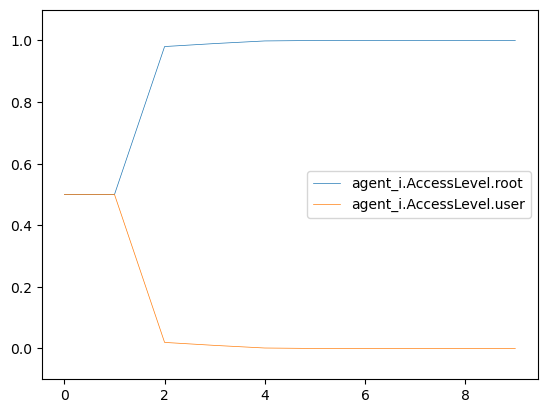

agent_j.AccessLevel.root  agent_j.AccessLevel.user  agent_j.action  \
0                  0.000000              1.000000e+00    EnumAccounts   
1                  0.000000              1.000000e+00      PrivEscAcc   
2                  0.999999              1.123457e-06       FileRecon   
3                  0.999999              6.683859e-07  ManipulateData   
4                  0.999999              5.618458e-07            Exit   
5                  1.000000              5.618458e-07             Nop   
6                  1.000000              5.618458e-07             Nop   
7                  1.000000              5.618458e-07             Nop   
8                  1.000000              5.618459e-07             Nop   
9                  1.000000              5.618459e-07             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           failure   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

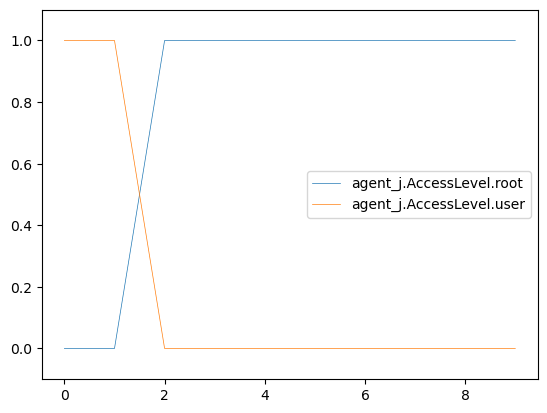

=============HostType============


state.HostType.critical  state.HostType.critical_honeypot  \
0                      0.0                               0.0   
1                      0.0                               0.0   
2                      0.0                               0.0   
3                      0.0                               0.0   
4                      0.0                               0.0   
5                      0.0                               0.0   
6                      0.0                               0.0   
7                      0.0                               0.0   
8                      0.0                               0.0   
9                      0.0                               0.0   

   state.HostType.honeypot    agent_i.action  agent_j.action  
0                      1.0      DecoyAccount    EnumAccounts  
1                      1.0  DeployDataDecoys      PrivEscAcc  
2                      1.0               Nop       FileRecon  
3                      1.0               Nop  ManipulateData  
4                      1.0               Nop            Exit  
5                      1.0               Nop             Nop  
6                      1.0               Nop             Nop  
7                      1.0               Nop             Nop  
8                      1.0               Nop             Nop  
9                      1.0               Nop             Nop

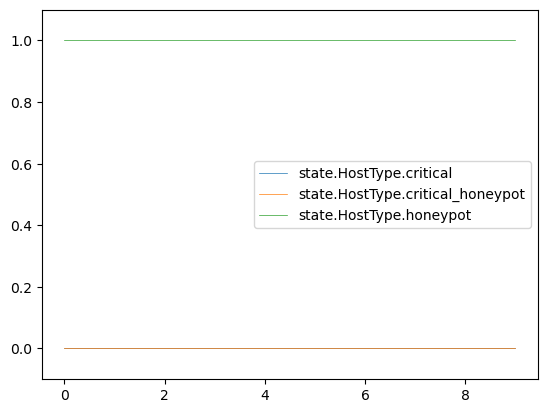

agent_i.HostType.critical  agent_i.HostType.critical_honeypot  \
0                        0.0                                 0.0   
1                        0.0                                 0.0   
2                        0.0                                 0.0   
3                        0.0                                 0.0   
4                        0.0                                 0.0   
5                        0.0                                 0.0   
6                        0.0                                 0.0   
7                        0.0                                 0.0   
8                        0.0                                 0.0   
9                        0.0                                 0.0   

   agent_i.HostType.honeypot    agent_i.action  agent_j.action  \
0                        1.0      DecoyAccount    EnumAccounts   
1                        1.0  DeployDataDecoys      PrivEscAcc   
2                        1.0               Nop       FileRecon   
3                        1.0               Nop  ManipulateData   
4                        1.0               Nop            Exit   
5                        1.0               Nop             Nop   
6                        1.0               Nop             Nop   
7                        1.0               Nop             Nop   
8                        1.0               Nop             Nop   
9                        1.0               Nop             Nop   

  agent_i.observation.EndPtAlerts'  
0                         su_login  
1                         su_login  
2                        file_enum  
3                       file_write  
4                             none  
5                             none  
6                             none  
7                             none  
8                             none  
9                             none

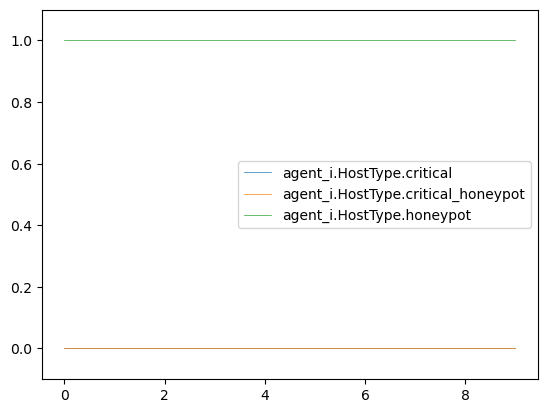

agent_j.HostType.critical  agent_j.HostType.critical_honeypot  \
0                   0.500000                                 0.0   
1                   0.333333                                 0.0   
2                   0.333333                                 0.0   
3                   0.468354                                 0.0   
4                   0.499965                                 0.0   
5                   0.499965                                 0.0   
6                   0.499965                                 0.0   
7                   0.499965                                 0.0   
8                   0.499965                                 0.0   
9                   0.499965                                 0.0   

   agent_j.HostType.honeypot  agent_j.action    agent_i.action  \
0                   0.500000    EnumAccounts      DecoyAccount   
1                   0.666667      PrivEscAcc  DeployDataDecoys   
2                   0.666667       FileRecon               Nop   
3                   0.531646  ManipulateData               Nop   
4                   0.500035            Exit               Nop   
5                   0.500035             Nop               Nop   
6                   0.500035             Nop               Nop   
7                   0.500035             Nop               Nop   
8                   0.500035             Nop               Nop   
9                   0.500035             Nop               Nop   

  agent_j.observation.ActionResult' agent_j.observation.ConnObs'  
0                           success                       active  
1                           success                       active  
2                           success                       active  
3                           success                       active  
4                           success                     inactive  
5                           failure                     inactive  
6                           failure                     inactive  
7                           success                     inactive  
8                           success                     inactive  
9                           failure                     inactive

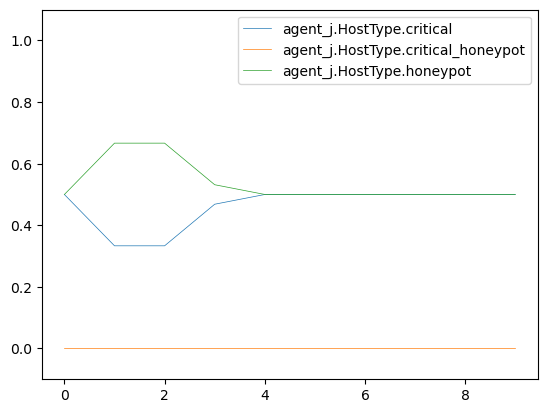

=============AttActive============


state.AttActive.no  state.AttActive.yes    agent_i.action  agent_j.action
0                 0.0                  1.0      DecoyAccount    EnumAccounts
1                 0.0                  1.0  DeployDataDecoys      PrivEscAcc
2                 0.0                  1.0               Nop       FileRecon
3                 0.0                  1.0               Nop  ManipulateData
4                 0.0                  1.0               Nop            Exit
5                 1.0                  0.0               Nop             Nop
6                 1.0                  0.0               Nop             Nop
7                 1.0                  0.0               Nop             Nop
8                 1.0                  0.0               Nop             Nop
9                 1.0                  0.0               Nop             Nop

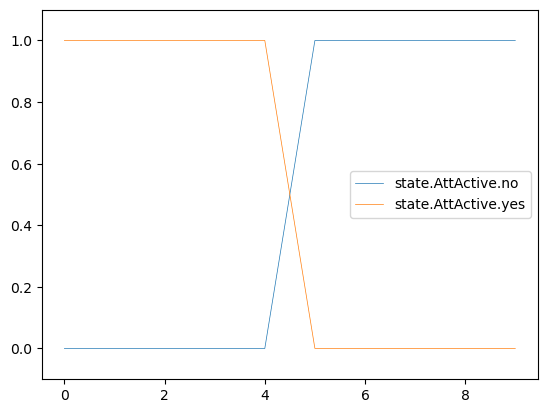

agent_i.AttActive.no  agent_i.AttActive.yes    agent_i.action  \
0              0.500000           5.000000e-01      DecoyAccount   
1              0.500000           5.000000e-01  DeployDataDecoys   
2              0.020000           9.800000e-01               Nop   
3              0.000211           9.997894e-01               Nop   
4              0.000059           9.999411e-01               Nop   
5              0.999567           4.327082e-04               Nop   
6              0.999995           5.050886e-06               Nop   
7              1.000000           1.543170e-08               Nop   
8              1.000000           3.928863e-11               Nop   
9              1.000000           1.446493e-13               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                         su_login  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

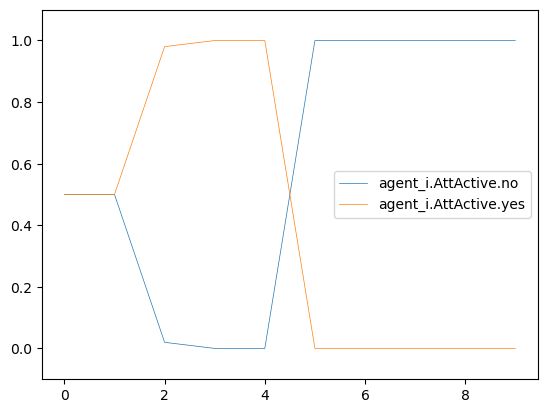

agent_j.AttActive.no  agent_j.AttActive.yes  agent_j.action  \
0                   0.0                    1.0    EnumAccounts   
1                   0.0                    1.0      PrivEscAcc   
2                   0.0                    1.0       FileRecon   
3                   0.0                    1.0  ManipulateData   
4                   0.0                    1.0            Exit   
5                   1.0                    0.0             Nop   
6                   1.0                    0.0             Nop   
7                   1.0                    0.0             Nop   
8                   1.0                    0.0             Nop   
9                   1.0                    0.0             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           failure   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

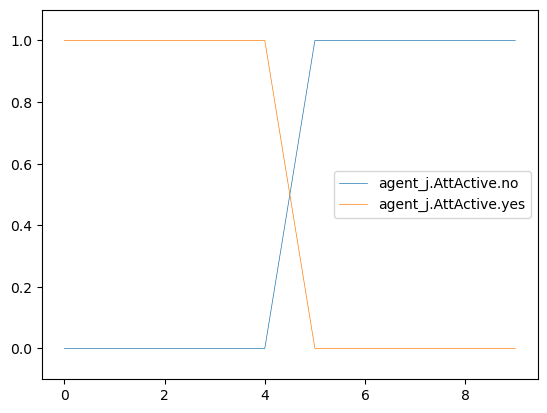

=============DataPrivs============


state.DataPrivs.root  state.DataPrivs.user    agent_i.action  \
0                   1.0                   0.0      DecoyAccount   
1                   1.0                   0.0  DeployDataDecoys   
2                   1.0                   0.0               Nop   
3                   1.0                   0.0               Nop   
4                   1.0                   0.0               Nop   
5                   1.0                   0.0               Nop   
6                   1.0                   0.0               Nop   
7                   1.0                   0.0               Nop   
8                   1.0                   0.0               Nop   
9                   1.0                   0.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

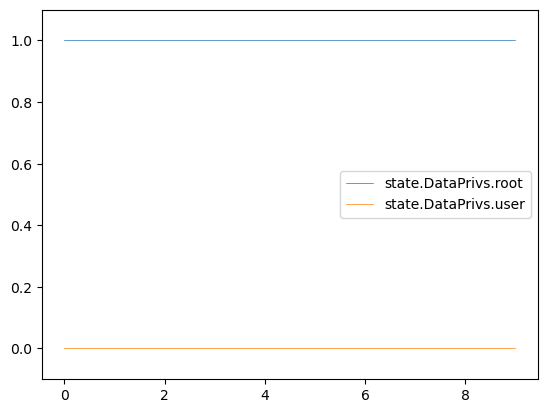

agent_i.DataPrivs.root  agent_i.DataPrivs.user    agent_i.action  \
0                     1.0                     0.0      DecoyAccount   
1                     1.0                     0.0  DeployDataDecoys   
2                     1.0                     0.0               Nop   
3                     1.0                     0.0               Nop   
4                     1.0                     0.0               Nop   
5                     1.0                     0.0               Nop   
6                     1.0                     0.0               Nop   
7                     1.0                     0.0               Nop   
8                     1.0                     0.0               Nop   
9                     1.0                     0.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                         su_login  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

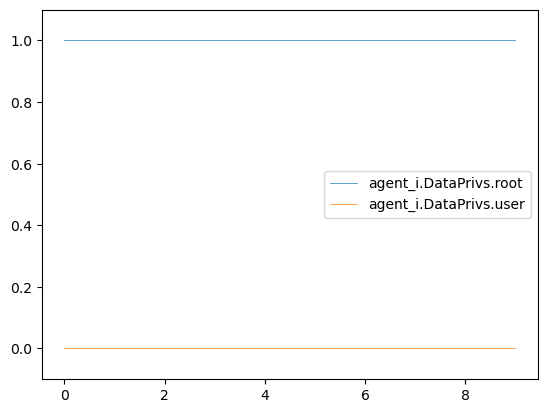

agent_j.DataPrivs.root  agent_j.DataPrivs.user  agent_j.action  \
0                     0.5                     0.5    EnumAccounts   
1                     0.5                     0.5      PrivEscAcc   
2                     0.5                     0.5       FileRecon   
3                     0.5                     0.5  ManipulateData   
4                     0.5                     0.5            Exit   
5                     0.5                     0.5             Nop   
6                     0.5                     0.5             Nop   
7                     0.5                     0.5             Nop   
8                     0.5                     0.5             Nop   
9                     0.5                     0.5             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           failure   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

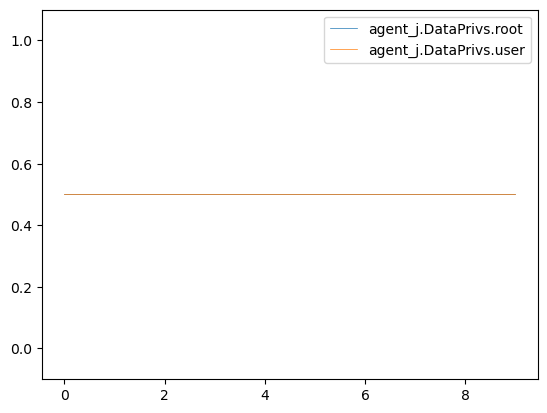

=============HostHasData============


state.HostHasData.no  state.HostHasData.yes    agent_i.action  \
0                   1.0                    0.0      DecoyAccount   
1                   1.0                    0.0  DeployDataDecoys   
2                   0.0                    1.0               Nop   
3                   0.0                    1.0               Nop   
4                   0.0                    1.0               Nop   
5                   0.0                    1.0               Nop   
6                   0.0                    1.0               Nop   
7                   0.0                    1.0               Nop   
8                   0.0                    1.0               Nop   
9                   0.0                    1.0               Nop   

   agent_j.action  
0    EnumAccounts  
1      PrivEscAcc  
2       FileRecon  
3  ManipulateData  
4            Exit  
5             Nop  
6             Nop  
7             Nop  
8             Nop  
9             Nop

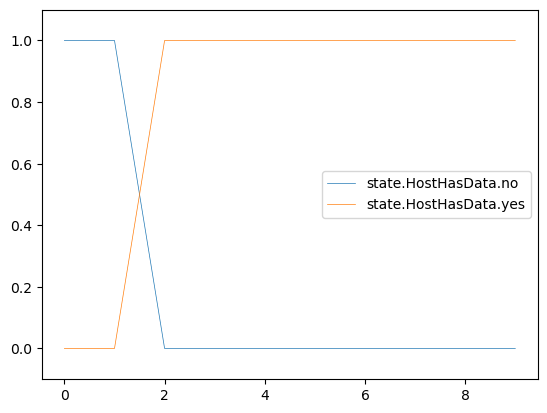

agent_i.HostHasData.no  agent_i.HostHasData.yes    agent_i.action  \
0                     1.0                      0.0      DecoyAccount   
1                     1.0                      0.0  DeployDataDecoys   
2                     0.0                      1.0               Nop   
3                     0.0                      1.0               Nop   
4                     0.0                      1.0               Nop   
5                     0.0                      1.0               Nop   
6                     0.0                      1.0               Nop   
7                     0.0                      1.0               Nop   
8                     0.0                      1.0               Nop   
9                     0.0                      1.0               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                         su_login  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

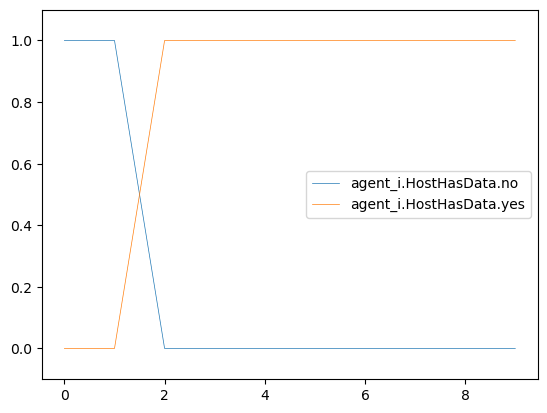

agent_j.HostHasData.no  agent_j.HostHasData.yes  agent_j.action  \
0                0.500000                 0.500000    EnumAccounts   
1                0.333333                 0.666667      PrivEscAcc   
2                0.333333                 0.666667       FileRecon   
3                0.063291                 0.936709  ManipulateData   
4                0.000070                 0.999930            Exit   
5                0.000070                 0.999931             Nop   
6                0.000070                 0.999931             Nop   
7                0.000070                 0.999931             Nop   
8                0.000070                 0.999931             Nop   
9                0.000070                 0.999931             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           failure   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

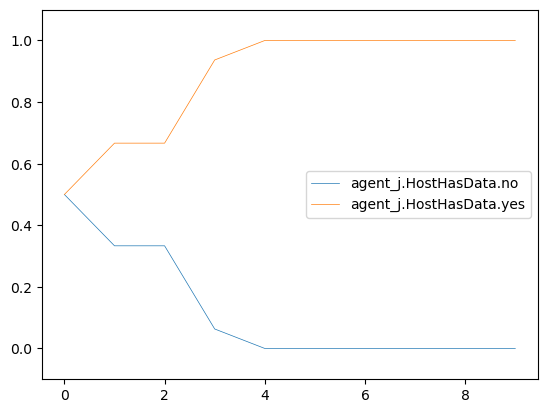

=============DataFound============


state.DataFound.no  state.DataFound.yes    agent_i.action  agent_j.action
0                 1.0                  0.0      DecoyAccount    EnumAccounts
1                 1.0                  0.0  DeployDataDecoys      PrivEscAcc
2                 1.0                  0.0               Nop       FileRecon
3                 0.0                  1.0               Nop  ManipulateData
4                 0.0                  1.0               Nop            Exit
5                 0.0                  1.0               Nop             Nop
6                 0.0                  1.0               Nop             Nop
7                 0.0                  1.0               Nop             Nop
8                 0.0                  1.0               Nop             Nop
9                 0.0                  1.0               Nop             Nop

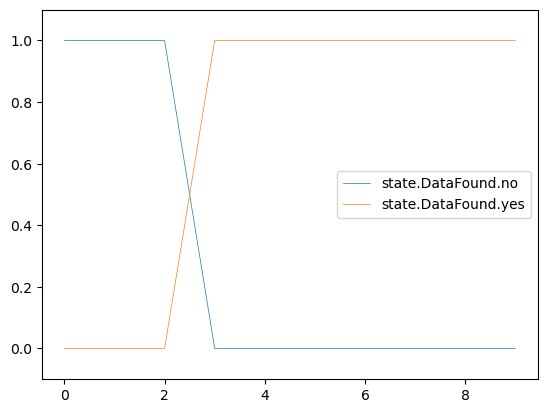

agent_i.DataFound.no  agent_i.DataFound.yes    agent_i.action  \
0              1.000000               0.000000      DecoyAccount   
1              1.000000               0.000000  DeployDataDecoys   
2              1.000000               0.000000               Nop   
3              0.208100               0.791900               Nop   
4              0.028918               0.971082               Nop   
5              0.000418               0.999582               Nop   
6              0.000328               0.999672               Nop   
7              0.000327               0.999673               Nop   
8              0.000327               0.999673               Nop   
9              0.000327               0.999673               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                         su_login  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

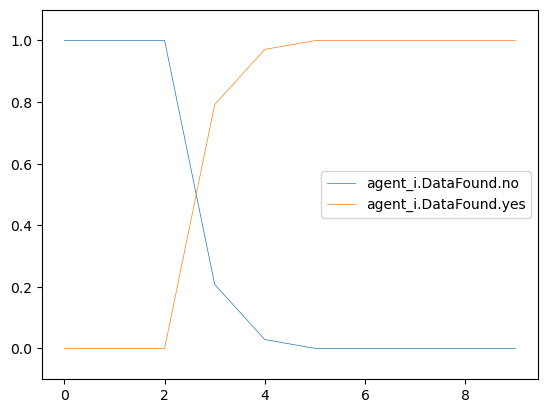

agent_j.DataFound.no  agent_j.DataFound.yes  agent_j.action  \
0              1.000000               0.000000    EnumAccounts   
1              1.000000               0.000000      PrivEscAcc   
2              1.000000               0.000000       FileRecon   
3              0.088608               0.911392  ManipulateData   
4              0.000097               0.999903            Exit   
5              0.000097               0.999903             Nop   
6              0.000097               0.999903             Nop   
7              0.000097               0.999903             Nop   
8              0.000097               0.999903             Nop   
9              0.000097               0.999903             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           failure   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

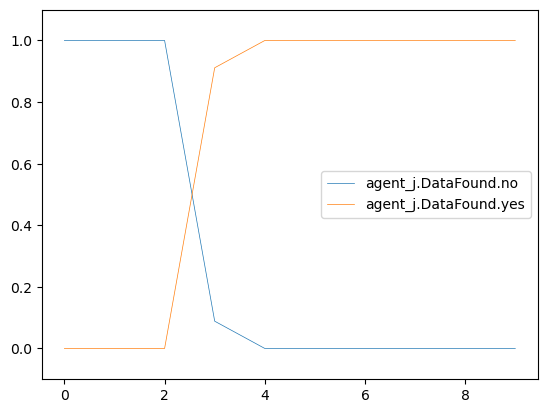

=============AccFound============


state.AccFound.no  state.AccFound.yes    agent_i.action  agent_j.action
0                1.0                 0.0      DecoyAccount    EnumAccounts
1                0.0                 1.0  DeployDataDecoys      PrivEscAcc
2                0.0                 1.0               Nop       FileRecon
3                0.0                 1.0               Nop  ManipulateData
4                0.0                 1.0               Nop            Exit
5                0.0                 1.0               Nop             Nop
6                0.0                 1.0               Nop             Nop
7                0.0                 1.0               Nop             Nop
8                0.0                 1.0               Nop             Nop
9                0.0                 1.0               Nop             Nop

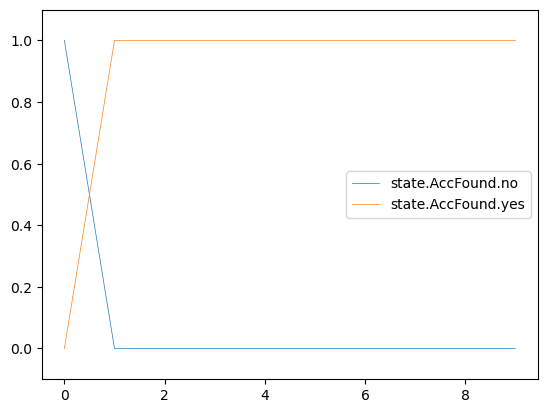

agent_i.AccFound.no  agent_i.AccFound.yes    agent_i.action  \
0             1.000000              0.000000      DecoyAccount   
1             0.752500              0.247500  DeployDataDecoys   
2             0.039700              0.960300               Nop   
3             0.019416              0.980584               Nop   
4             0.010778              0.989223               Nop   
5             0.009689              0.990311               Nop   
6             0.009693              0.990307               Nop   
7             0.009693              0.990307               Nop   
8             0.009693              0.990307               Nop   
9             0.009693              0.990307               Nop   

   agent_j.action agent_i.observation.EndPtAlerts'  
0    EnumAccounts                         su_login  
1      PrivEscAcc                         su_login  
2       FileRecon                        file_enum  
3  ManipulateData                       file_write  
4            Exit                             none  
5             Nop                             none  
6             Nop                             none  
7             Nop                             none  
8             Nop                             none  
9             Nop                             none

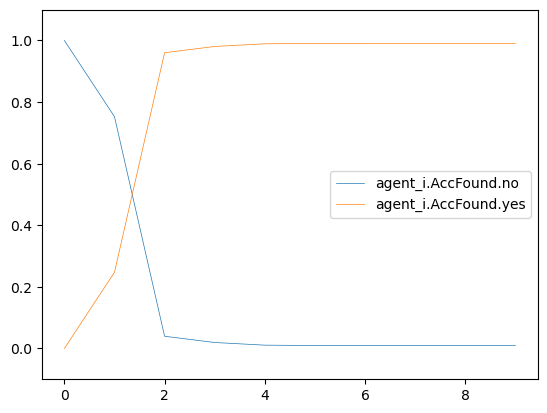

agent_j.AccFound.no  agent_j.AccFound.yes  agent_j.action  \
0         1.000000e+00              0.000000    EnumAccounts   
1         1.121076e-03              0.998879      PrivEscAcc   
2         1.123457e-06              0.999999       FileRecon   
3         6.683859e-07              0.999999  ManipulateData   
4         5.618458e-07              0.999999            Exit   
5         5.618458e-07              1.000000             Nop   
6         5.618458e-07              1.000000             Nop   
7         5.618458e-07              1.000000             Nop   
8         5.618459e-07              1.000000             Nop   
9         5.618459e-07              1.000000             Nop   

     agent_i.action agent_j.observation.ActionResult'  \
0      DecoyAccount                           success   
1  DeployDataDecoys                           success   
2               Nop                           success   
3               Nop                           success   
4               Nop                           success   
5               Nop                           failure   
6               Nop                           failure   
7               Nop                           success   
8               Nop                           success   
9               Nop                           failure   

  agent_j.observation.ConnObs'  
0                       active  
1                       active  
2                       active  
3                       active  
4                     inactive  
5                     inactive  
6                     inactive  
7                     inactive  
8                     inactive  
9                     inactive

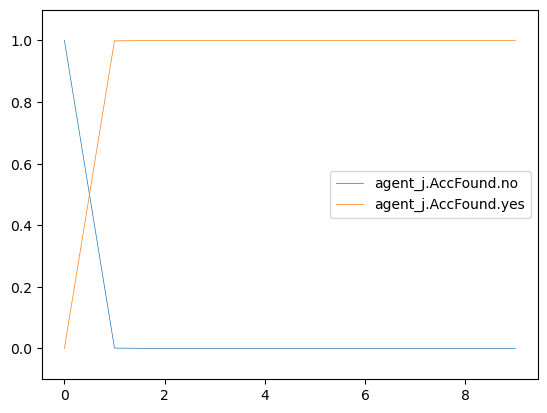

+++++++++++++++++++ End Interaction +++++++++++++++++++


In [7]:
# Get belief over opponent frames
def get_opponent_frame(dataframe):
    
    thetaj_columns = list(filter(lambda x: "thetaj" in x.split("."), dataframe))
    
    if len(thetaj_columns) > 0:
        return dataframe[thetaj_columns]
    
    else:
        return None

# Print and plot P(Theta_j)
def print_thetaj_belief(belief_thetaj_df, obs):
    df = pandas.concat([belief_thetaj_df, obs], axis=1)
    display(df)
    df.plot(linewidth=0.5)
    plotter.ylim(-0.1, 1.1)
    plotter.show()

# Summarize beliefs
def summarize_beliefs(state_vars, dataframe):
    print(f"+++++++++++++++++++ Begin Interaction +++++++++++++++++++")
    agent_i_data = filter_columns_by_agent(dataframe, "agent_i")
    agent_j_data = filter_columns_by_agent(dataframe, "agent_j")
    states = filter_columns_by_agent(dataframe, "state")
    
    actions_i = filter_columns_by_state(agent_i_data, "action")
    actions_j = filter_columns_by_state(agent_j_data, "action")
    
    obs_i = filter_columns_by_state(agent_i_data, "observation")
    obs_j = filter_columns_by_state(agent_j_data, "observation")
    
    i_belief_thetaj = get_opponent_frame(agent_i_data)
    if i_belief_thetaj is not None:
        print_thetaj_belief(i_belief_thetaj, obs_i)
    
    j_belief_thetaj = get_opponent_frame(agent_j_data)
    if j_belief_thetaj is not None:
        print_thetaj_belief(j_belief_thetaj, obs_j)
    
    for var in state_vars:
        print(f"============={var}============")
        # show state
        state_values = filter_columns_by_state(states, var)
        state_values = pandas.concat([state_values, actions_i, actions_j], axis = 1)
        display(state_values)
        state_values.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent i
        agent_i_beliefs = filter_columns_by_state(agent_i_data, var)
        agent_i_beliefs = pandas.concat([agent_i_beliefs, actions_i, actions_j, obs_i], axis = 1)
        display(agent_i_beliefs)
        agent_i_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        
        # show agent j
        agent_j_beliefs = filter_columns_by_state(agent_j_data, var)
        agent_j_beliefs = pandas.concat([agent_j_beliefs, actions_j, actions_i, obs_j], axis = 1)
        display(agent_j_beliefs)
        agent_j_beliefs.plot(linewidth=0.5)
        plotter.ylim(-0.1, 1.1)
        plotter.show()
        print("==============================")
    
    print(f"+++++++++++++++++++ End Interaction +++++++++++++++++++")

# Use state data to figure out the state variables
def get_state_vars(columns):
    
    states = filter(lambda x: "state" in x.split(".") and len(x.split(".")) >= 2, columns)
    state_vars = map(lambda x: x.split(".")[1], states)
    
    return list(set(state_vars))

# Fetch dataframe with columns belonging to a particular agent
def filter_columns_by_agent(dataframe, name):
    columns = dataframe.columns
    filtered_columns = list(filter(lambda x: name in x.split("."), columns))
    
    df = dataframe[filtered_columns]
    return df

# Get columns containing the state name in the header
def filter_columns_by_state(dataframe, state):
    filtered_columns = list(filter(lambda x: state in x.split("."), dataframe.columns))
    return dataframe[filtered_columns]

# Main loop to summarize all traces
for trace in TRACE_FILES[:5]:
    data = load_json(trace)
    
    dataframe = pandas.json_normalize(data)    
    state_vars = get_state_vars(dataframe.columns)
    
    summarize_beliefs(state_vars, dataframe)

    